In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("raw.githubusercontent.com_dsrscientist_Data-Science-ML-Capstone-Projects_master_Automobile_insurance_fraud.csv")
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [3]:
print('No of Rows:',df.shape[0])
print('No of Columns:',df.shape[1])
pd.set_option('display.max_columns', None)
df.head()

No of Rows: 1000
No of Columns: 40


,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_date,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,MALE,MD,craft-repair,sleeping,husband,53300,0,25-01-2015,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,9935 4th Drive,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,MALE,MD,machine-op-inspct,reading,other-relative,0,0,21-01-2015,Vehicle Theft,?,Minor Damage,Police,VA,Riverwood,6608 MLK Hwy,8,1,?,0,0,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,FEMALE,PhD,sales,board-games,own-child,35100,0,22-02-2015,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7121 Francis Lane,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,10-01-2015,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,6956 Maple Drive,5,1,?,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,MALE,Associate,sales,board-games,unmarried,66000,-46000,17-02-2015,Vehicle Theft,?,Minor Damage,None,NY,Arlington,3041 3rd Ave,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [4]:
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['months_as_customer', 'age', 'policy_number', 'policy_deductable', 'umbrella_limit', 'insured_zip', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year'], float64: ['policy_annual_premium', '_c39'], object: ['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_date', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'incident_location', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported']}

# Statistical Analysis

In [5]:
df.duplicated('policy_number').sum()

0

In [6]:
df.isin([' ','NA','-']).sum().any()

False

In [7]:
df.isin(['?']).sum().any()

True

In [8]:
df=df.replace('?',np.NaN)

# Missing value check

In [9]:
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                             Missing Values  % Missing data
_c39                                   1000           100.0
property_damage                         360            36.0
police_report_available                 343            34.3
collision_type                          178            17.8
bodily_injuries                           0             0.0
incident_state                            0             0.0
incident_city                             0             0.0
incident_location                         0             0.0
incident_hour_of_the_day                  0             0.0
number_of_vehicles_involved               0             0.0
fraud_reported                            0             0.0
auto_year                                 0             0.0
auto_model                                0             0.0
authorities_contacted                     0             0.0
total_claim_amount                        0             0.0
injury_claim                            

In [10]:
df['property_damage'].fillna(df['property_damage'].mode()[0],inplace=True)
df['police_report_available'].fillna(df['police_report_available'].mode()[0],inplace=True)
df['collision_type'].fillna(df['collision_type'].mode()[0],inplace=True)

In [11]:
df.drop(['_c39','incident_location','insured_zip','policy_number'],axis=1,inplace=True)

# Missing value check after imputation

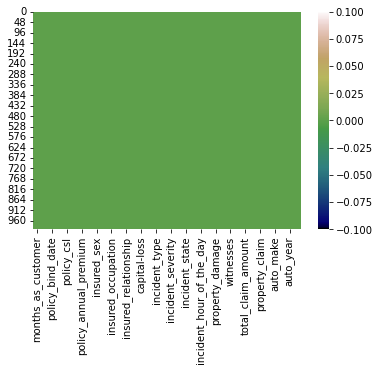

In [12]:
sns.heatmap(df.isnull(),cmap="gist_earth")
plt.show()

In [13]:
df['CSL_Personal']=df.policy_csl.str.split('/',expand=True)[0]
df['CSL_Accidental']=df.policy_csl.str.split('/',expand=True)[1]

In [14]:
df.drop("policy_csl",axis=1,inplace=True)

In [15]:
df['policy_bind_date']=pd.to_datetime(df['policy_bind_date'])
df['incident_date']=pd.to_datetime(df['incident_date'])

In [16]:
df['policy_bind_day'] = df['policy_bind_date'].dt.day
df['policy_bind_month'] = df['policy_bind_date'].dt.month
df['policy_bind_year'] = df['policy_bind_date'].dt.year

df['incident_day'] = df['incident_date'].dt.day
df['incident_month'] = df['incident_date'].dt.month
df['incident_year'] = df['incident_date'].dt.year

In [17]:
df.drop(['policy_bind_date','incident_date'],axis=1,inplace=True)

In [18]:
df.drop(['incident_year'],axis=1,inplace=True)

In [19]:
df['Automobile_Age']=2015 - df['auto_year']
df.drop("auto_year",axis=1,inplace=True)

In [20]:
Category = ['policy_state',  'insured_sex', 'insured_education_level', 'insured_occupation', 
            'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity',
            'authorities_contacted','incident_state', 'incident_city', 'property_damage','police_report_available',
            'auto_make','auto_model', 'fraud_reported']
    
Numerical = ['months_as_customer','CSL_Personal','CSL_Accidental', 'age', 'policy_deductable', 'umbrella_limit', 'capital-gains', 'capital-loss', 
             'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 
             'total_claim_amount','injury_claim', 'property_claim', 'vehicle_claim', 'Automobile_Age','policy_annual_premium']

In [21]:
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['months_as_customer', 'age', 'policy_deductable', 'umbrella_limit', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'policy_bind_day', 'policy_bind_month', 'policy_bind_year', 'incident_day', 'incident_month', 'Automobile_Age'], float64: ['policy_annual_premium'], object: ['policy_state', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported', 'CSL_Personal', 'CSL_Accidental']}

# Statistical Matrix

In [22]:
df.describe().T.style.background_gradient(subset=['mean','std','50%','count'], cmap='RdPu')

,count,mean,std,min,25%,50%,75%,max
months_as_customer,1000.000000,203.954000,115.113174,0.000000,115.750000,199.500000,276.250000,479.000000
age,1000.000000,38.948000,9.140287,19.000000,32.000000,38.000000,44.000000,64.000000
policy_deductable,1000.000000,1136.000000,611.864673,500.000000,500.000000,1000.000000,2000.000000,2000.000000
policy_annual_premium,1000.000000,1256.406150,244.167395,433.330000,1089.607500,1257.200000,1415.695000,2047.590000
umbrella_limit,1000.000000,1101000.000000,2297406.598118,-1000000.000000,0.000000,0.000000,0.000000,10000000.000000
capital-gains,1000.000000,25126.100000,27872.187708,0.000000,0.000000,0.000000,51025.000000,100500.000000
capital-loss,1000.000000,-26793.700000,28104.096686,-111100.000000,-51500.000000,-23250.000000,0.000000,0.000000
incident_hour_of_the_day,1000.000000,11.644000,6.951373,0.000000,6.000000,12.000000,17.000000,23.000000
number_of_vehicles_involved,1000.000000,1.839000,1.018880,1.000000,1.000000,1.000000,3.000000,4.000000
bodily_injuries,1000.000000,0.992000,0.820127,0.000000,0.000000,1.000000,2.000000,2.000000


In [23]:
df[Category].describe().T.style.background_gradient(cmap='summer_r')

,count,unique,top,freq
policy_state,1000,3,OH,352
insured_sex,1000,2,FEMALE,537
insured_education_level,1000,7,JD,161
insured_occupation,1000,14,machine-op-inspct,93
insured_hobbies,1000,20,reading,64
insured_relationship,1000,6,own-child,183
incident_type,1000,4,Multi-vehicle Collision,419
collision_type,1000,3,Rear Collision,470
incident_severity,1000,4,Minor Damage,354
authorities_contacted,1000,5,Police,292


In [24]:
for i in Category:
    print(i)
    print(df[i].value_counts())
    print("="*100)

policy_state
OH    352
IL    338
IN    310
Name: policy_state, dtype: int64
insured_sex
FEMALE    537
MALE      463
Name: insured_sex, dtype: int64
insured_education_level
JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64
insured_occupation
machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
other-service        71
priv-house-serv      71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64
insured_hobbies
reading           64
exercise          57
paintball         57
bungie-jumping    56
movies            55
golf              55
camping           55
kayaking          54
yachting          53
hiking            52
video-games       50
skydiving 

# Start exploring Target variable

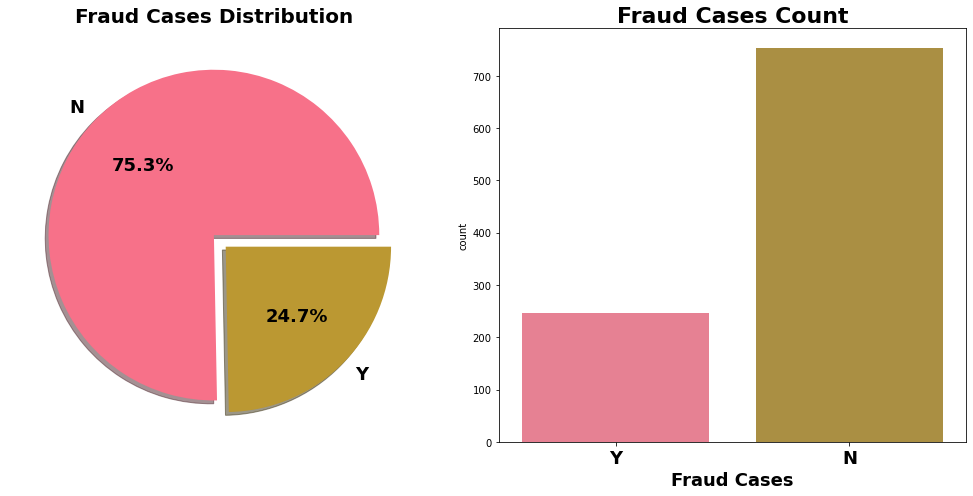

In [25]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
f,ax=plt.subplots(1,2,figsize=(14,7))
df['fraud_reported'].value_counts().plot.pie(explode=[0,0.1],autopct='%3.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':18}, ax=ax[0],shadow=True)
ax[0].set_title('Fraud Cases Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('fraud_reported',data=df,ax=ax[1])
ax[1].set_title('Fraud Cases Count',fontsize=22,fontweight ='bold')
ax[1].set_xlabel("Fraud Cases",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=18,fontweight ='bold')
plt.show()

# Analysing Age vs Fraud

In [26]:
print('Minimum Age :',df.age.min(),'Years')
print('Maximum Age :',df.age.max(),'Years')
print('Average Age :',df.age.mean(),'Years')

Minimum Age : 19 Years
Maximum Age : 64 Years
Average Age : 38.948 Years


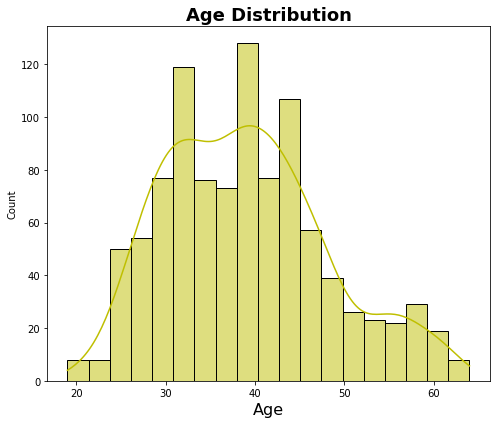

In [27]:
plt.figure(figsize=(7,6))
sns.histplot(df.age, kde=True, color='y')
plt.xlabel('Age',fontsize=16)
plt.title('Age Distribution', fontsize=18,fontweight ='bold')
plt.show()

In [28]:
df['age_bins'] = pd.cut(df.age, bins = [0, 10, 20, 30, 40, 50, 60, 70], 
                          include_lowest = True, labels = ['0-10','11-20','21-30','31-40', '41-50', '51-60', '61-70'])

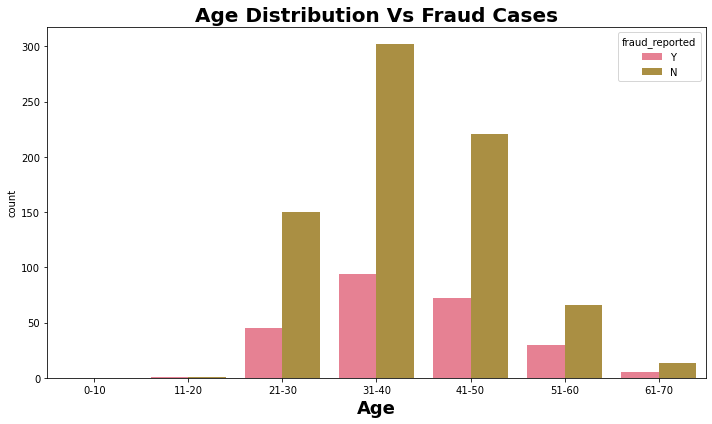

In [29]:
plt.figure(figsize=(10,6))
sns.countplot(x=df.age_bins, hue=df.fraud_reported)
plt.xlabel('Age',fontsize=18,fontweight ='bold')
plt.title('Age Distribution Vs Fraud Cases', fontsize=20,fontweight ='bold')
plt.show()

# Policy State Vs Fraud cases

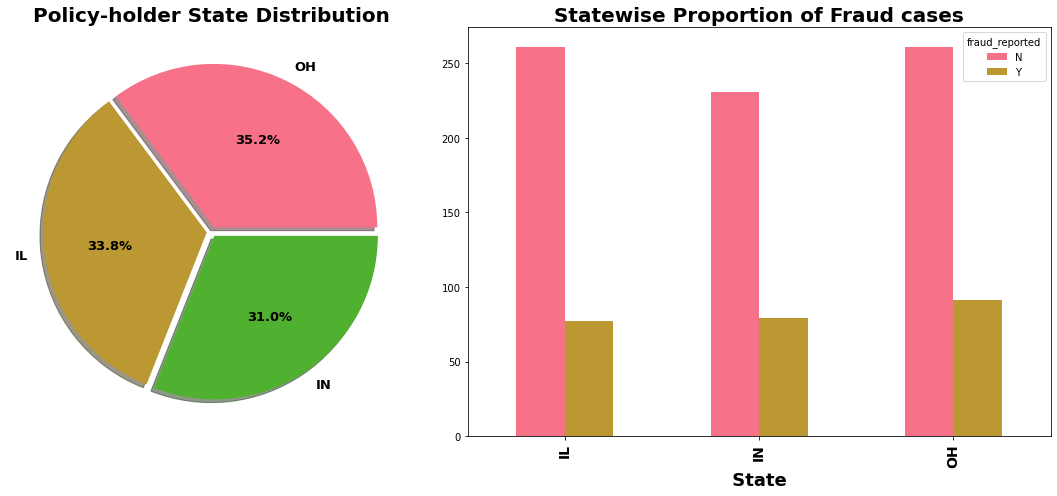

In [30]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
fig,ax=plt.subplots(1,2,figsize=(16,7))
df['policy_state'].value_counts().plot.pie(explode=[0.03,0.03,0.03],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Policy-holder State Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')

table = pd.crosstab(df['policy_state'], df['fraud_reported'])
table.plot(kind = 'bar', ax=ax[1])
ax[1].set_title('Statewise Proportion of Fraud cases',fontsize=20,fontweight ='bold')
ax[1].set_xlabel(" State ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

# Insured Gender VS Fraud cases

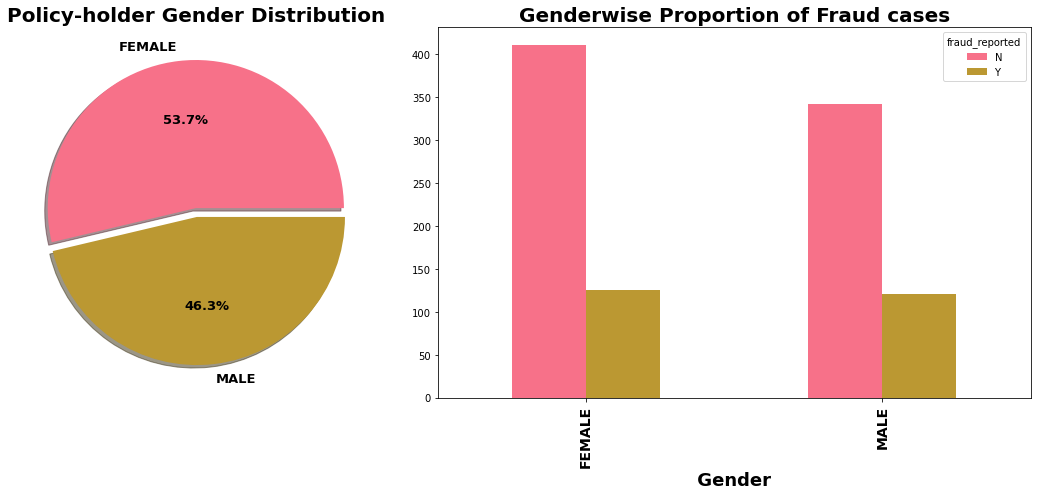

In [31]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
fig,ax=plt.subplots(1,2,figsize=(16,7))
df['insured_sex'].value_counts().plot.pie(explode=[0.03,0.03],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Policy-holder Gender Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')

table = pd.crosstab(df['insured_sex'], df['fraud_reported'])
table.plot(kind = 'bar', ax=ax[1])
ax[1].set_title('Genderwise Proportion of Fraud cases',fontsize=20,fontweight ='bold')
ax[1].set_xlabel(" Gender ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

# Education_level vs Fraud cases

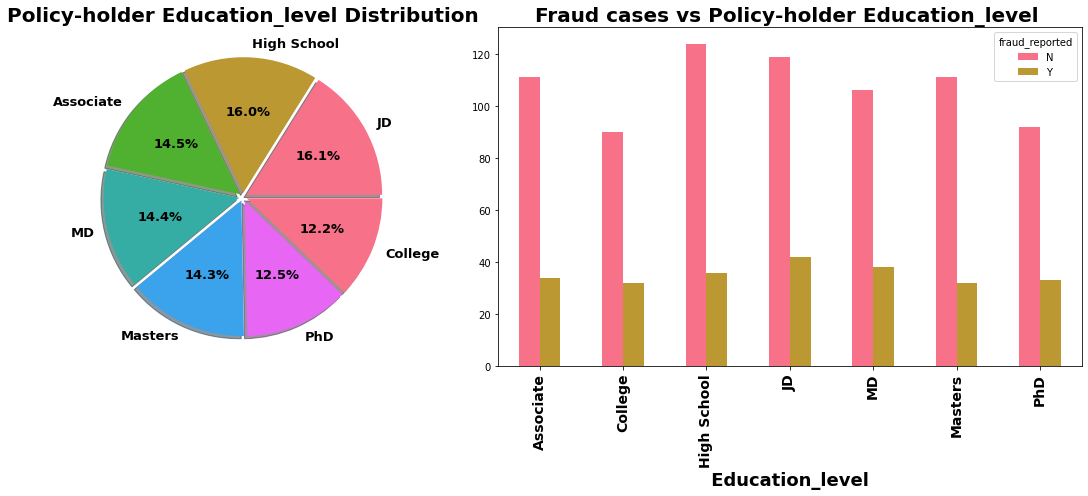

In [32]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('husl')
fig,ax=plt.subplots(1,2,figsize=(16,7))
df['insured_education_level'].value_counts().plot.pie(explode=[0.03,0.03,0.03,0.03,0.03,0.03,.03],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Policy-holder Education_level Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')

table = pd.crosstab(df['insured_education_level'], df['fraud_reported'])
table.plot(kind = 'bar', ax=ax[1])
ax[1].set_title('Fraud cases vs Policy-holder Education_level ',fontsize=20,fontweight ='bold')
ax[1].set_xlabel(" Education_level ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold')
plt.tight_layout()
plt.show()

# Occupation of Insured Customers

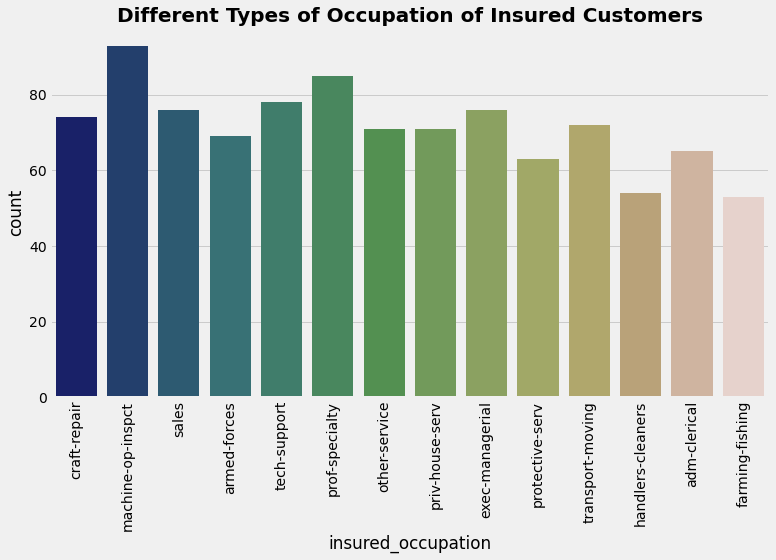

In [33]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (11, 8)
sns.countplot(df['insured_occupation'], palette = 'gist_earth')
plt.title('Different Types of Occupation of Insured Customers' ,fontsize=20,fontweight ='bold')
plt.xticks(rotation = 90)
plt.show()

# Hobbies of Insured Customers

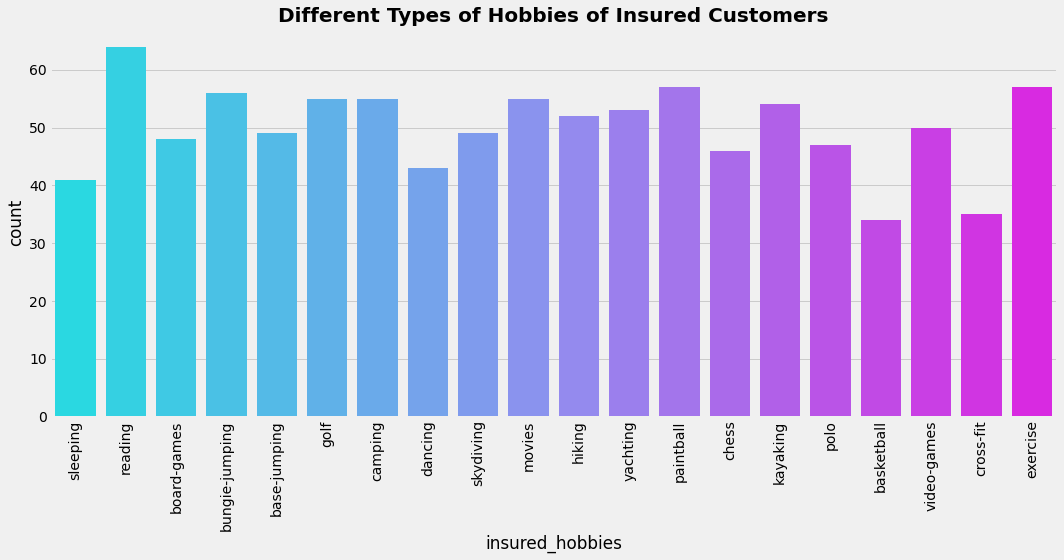

In [34]:
plt.rcParams['figure.figsize'] = (15, 8)
sns.countplot(df['insured_hobbies'], palette = 'cool')
plt.title('Different Types of Hobbies of Insured Customers',fontsize=20,fontweight ='bold')
plt.xticks(rotation = 90)
plt.show() 

# Different Types of Incidents Vs Fraud cases

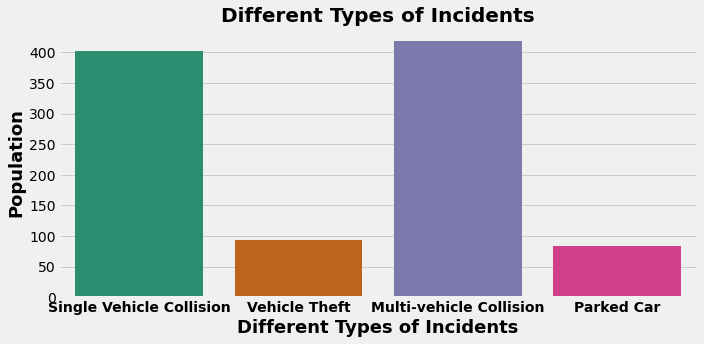

In [35]:
plt.rcParams['figure.figsize'] = (10,5)
sns.countplot(df['incident_type'], palette = 'Dark2')
plt.title('Different Types of Incidents',fontsize=20,fontweight ='bold')
plt.xlabel('Different Types of Incidents', fontsize=18,fontweight='bold')
plt.ylabel('Population', fontsize=18,fontweight='bold')
plt.xticks(fontweight ='bold')
plt.show()

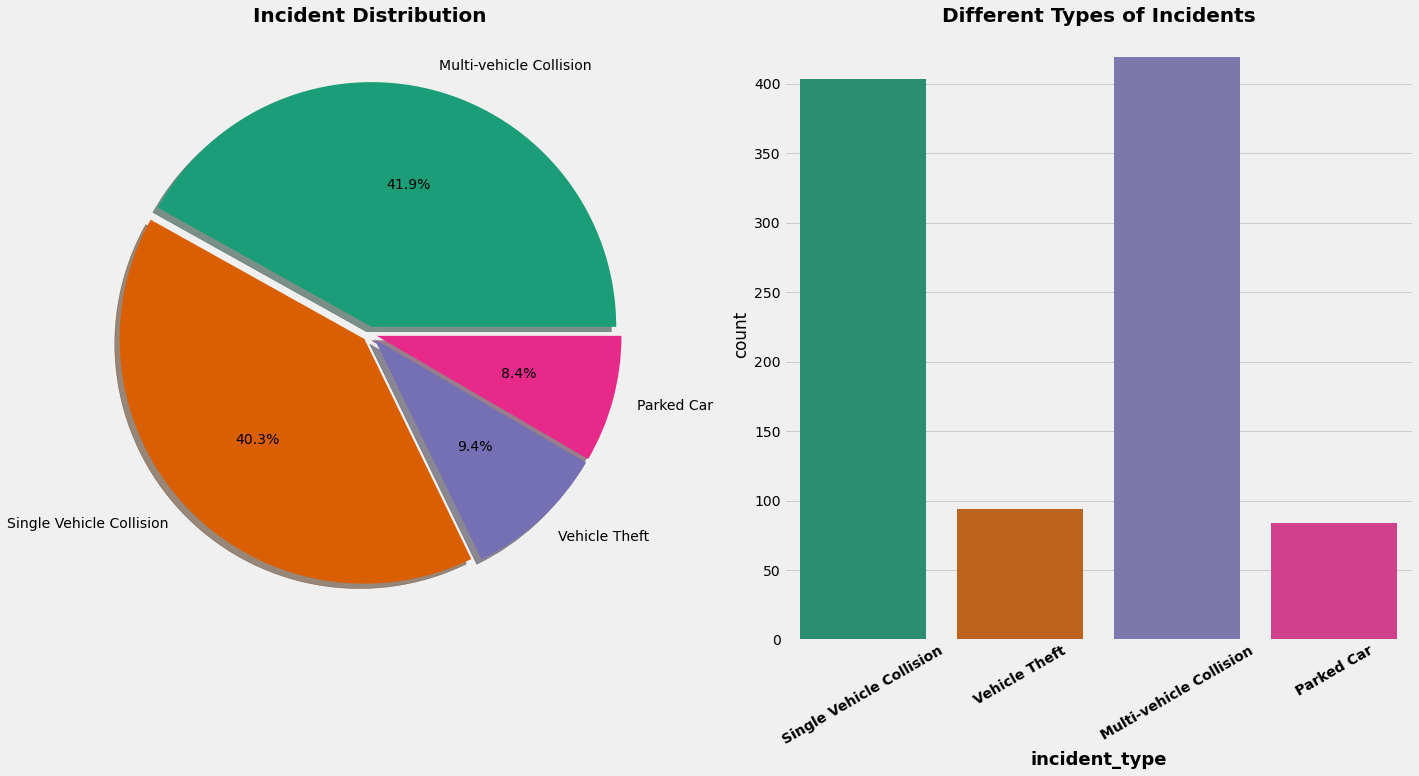

In [36]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('Dark2')
f,ax=plt.subplots(1,2,figsize=(20,11))
df['incident_type'].value_counts().plot.pie(explode=[0.03,.03,.03,.03],autopct='%3.1f%%',
                                          textprops ={ 'fontsize':14}, ax=ax[0],shadow=True)
ax[0].set_title('Incident Distribution', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')
sns.countplot('incident_type',data=df,ax=ax[1])
ax[1].set_title('Different Types of Incidents',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("incident_type",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,rotation=30,fontweight ='bold')
plt.tight_layout()
plt.show()

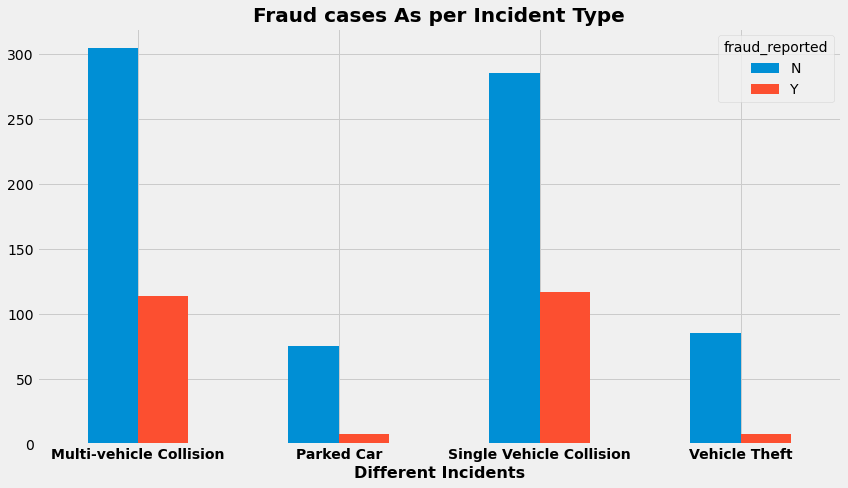

In [37]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12,7)
table = pd.crosstab(df['incident_type'], df['fraud_reported'])
table.plot(kind = 'bar')
plt.title('Fraud cases As per Incident Type',fontsize=20,fontweight ='bold')
plt.xlabel('Different Incidents', fontsize=16,fontweight='bold')
plt.xticks(fontsize=14,rotation=0,fontweight ='bold')
plt.show()

# Exploration of different Collision

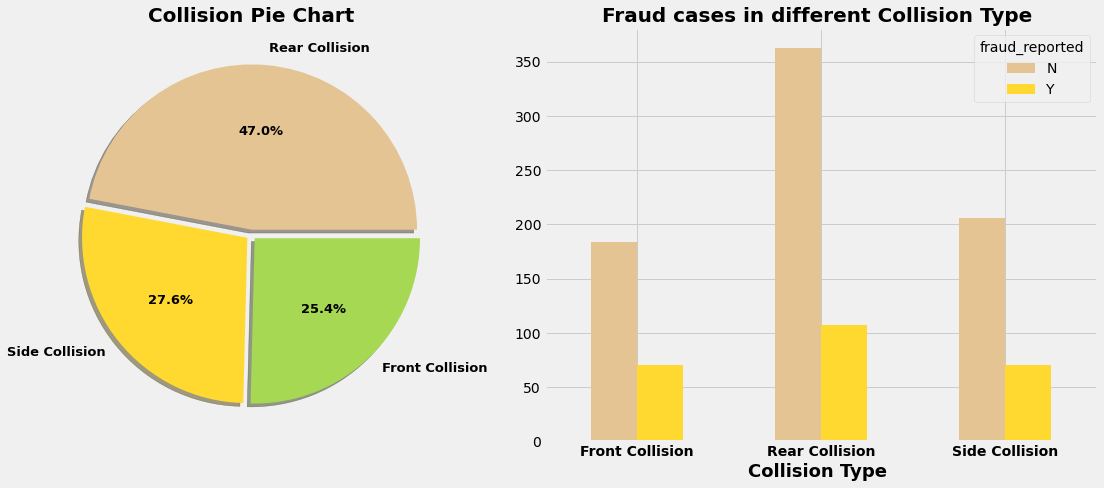

In [38]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('Set2_r')
fig,ax=plt.subplots(1,2,figsize=(16,7))
df['collision_type'].value_counts().plot.pie(explode=[0.03,0.03,0.03],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Collision Pie Chart', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')

table = pd.crosstab(df['collision_type'], df['fraud_reported'])
table.plot(kind = 'bar', ax=ax[1])
ax[1].set_title('Fraud cases in different Collision Type ',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Collision Type ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold',rotation=0)
plt.tight_layout()
plt.show()

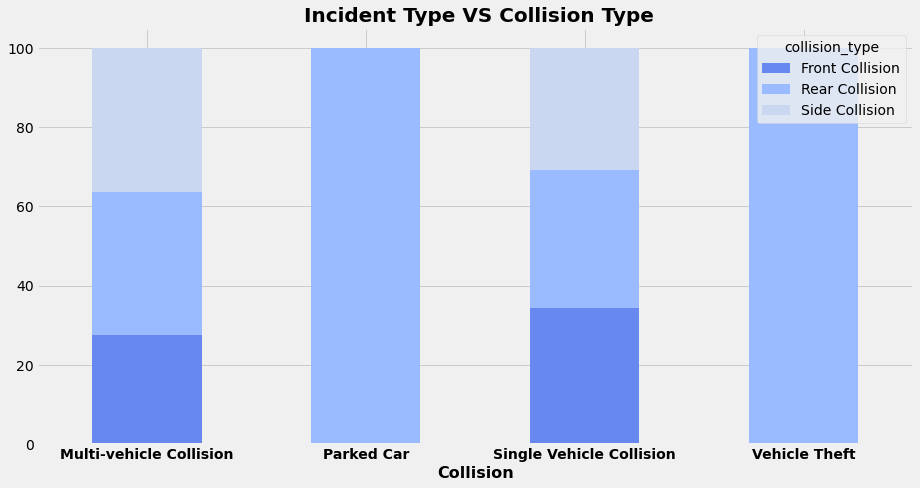

In [39]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (13,7)
sns.set_palette('coolwarm')
table = pd.crosstab(df['incident_type'], df['collision_type'])
(table.div(table.sum(axis=1),axis=0)*100).plot(kind='bar',stacked=True)
plt.title(' Incident Type VS Collision Type',fontsize=20,fontweight ='bold')
plt.xlabel('Collision', fontsize=16,fontweight='bold')
plt.xticks(fontsize=14,rotation=0,fontweight ='bold')
plt.show()

# Collision VS Incident Severity

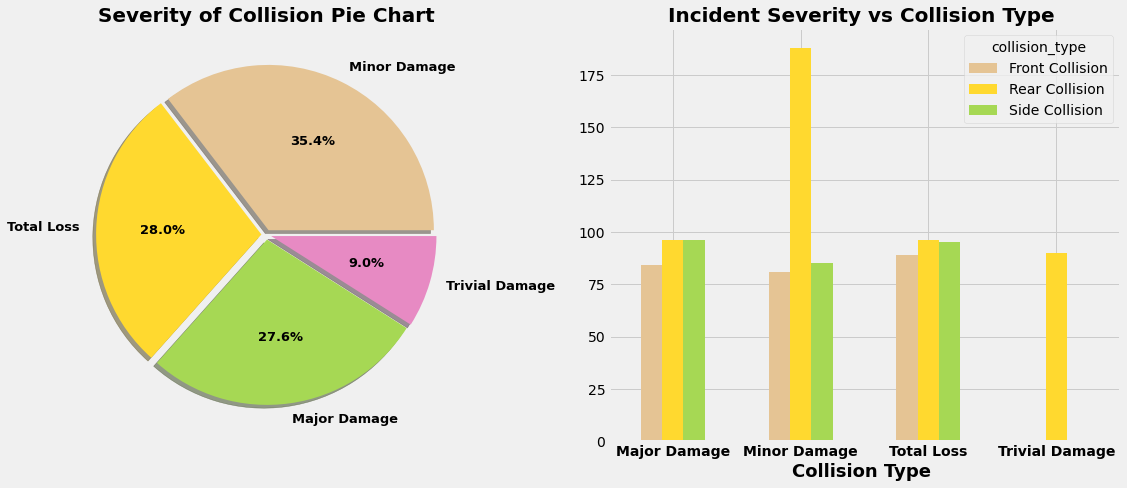

In [40]:
plt.rcParams["figure.autolayout"] = True
sns.set_palette('Set2_r')
fig,ax=plt.subplots(1,2,figsize=(16,7))
df['incident_severity'].value_counts().plot.pie(explode=[0.03,0.03,0.03,.03],autopct='%2.1f%%',
                                          textprops ={ 'fontweight': 'bold','fontsize':13}, ax=ax[0],shadow=True)
ax[0].set_title('Severity of Collision Pie Chart', fontsize=20,fontweight ='bold')
ax[0].set_ylabel('')

table = pd.crosstab(df['incident_severity'], df['collision_type'])
table.plot(kind = 'bar', ax=ax[1])
ax[1].set_title('Incident Severity vs Collision Type ',fontsize=20,fontweight ='bold')
ax[1].set_xlabel("Collision Type ",fontsize=18,fontweight ='bold')
plt.xticks(fontsize=14,fontweight ='bold',rotation=0)
plt.tight_layout()
plt.show()

In [41]:
pd.crosstab(df['incident_type'], df['incident_severity']).style.background_gradient(cmap='summer_r')

incident_severity,Major Damage,Minor Damage,Total Loss,Trivial Damage
incident_type,,,,
Multi-vehicle Collision,144,130,145,0
Parked Car,0,42,0,42
Single Vehicle Collision,132,136,135,0
Vehicle Theft,0,46,0,48


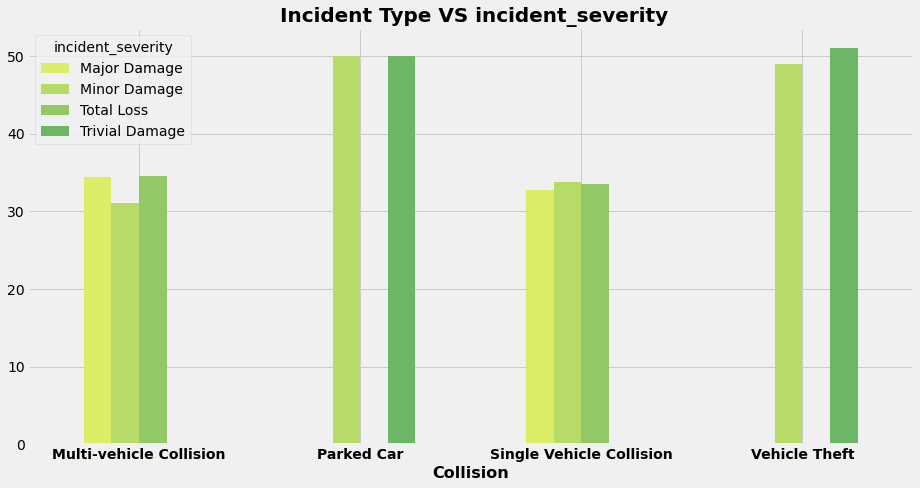

In [42]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (13,7)
sns.set_palette('summer_r')
table = pd.crosstab(df['incident_type'], df['incident_severity'])
(table.div(table.sum(axis=1),axis=0)*100).plot(kind='bar')
plt.title(' Incident Type VS incident_severity',fontsize=20,fontweight ='bold')
plt.xlabel('Collision', fontsize=16,fontweight='bold')
plt.xticks(fontsize=14,rotation=0,fontweight ='bold')
plt.show() 

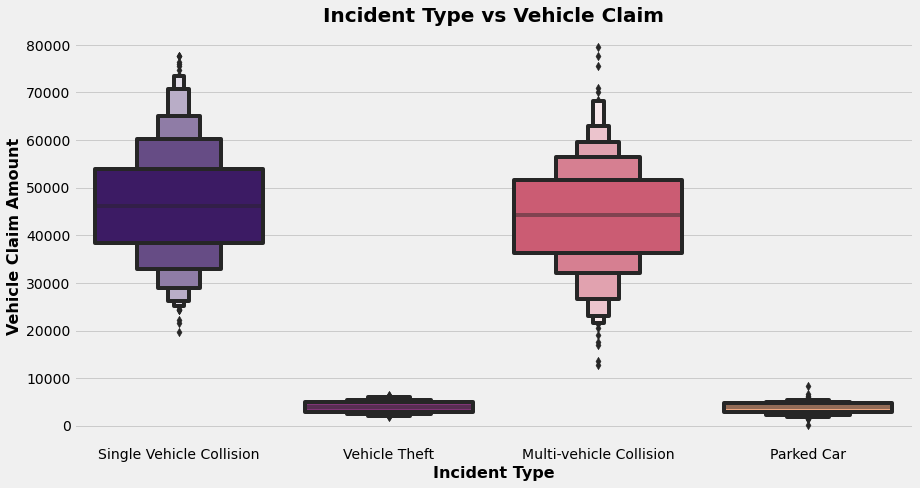

In [43]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (13,7)
sns.boxenplot(df['incident_type'], df['vehicle_claim'], palette = 'magma')
plt.title('Incident Type vs Vehicle Claim',fontsize=20,fontweight ='bold')
plt.xlabel('Incident Type', fontsize=16,fontweight='bold')
plt.ylabel('Vehicle Claim Amount', fontsize=16,fontweight='bold')
plt.show()

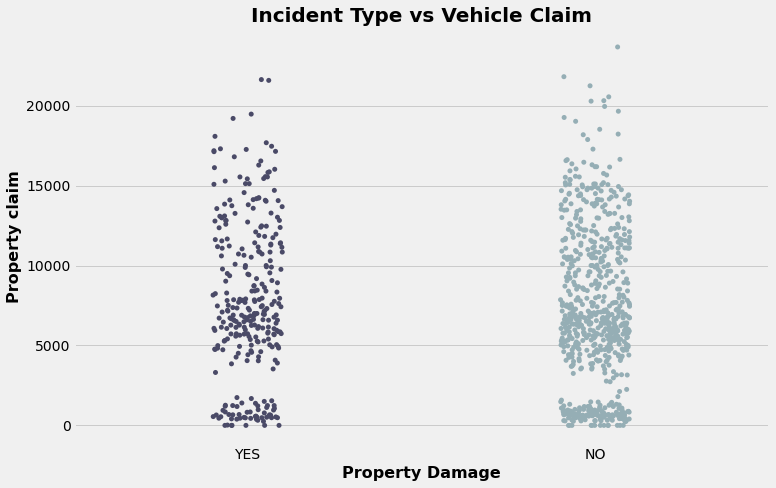

In [44]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (11,7)
sns.stripplot(df['property_damage'], df['property_claim'], palette = 'bone')
plt.title('Incident Type vs Vehicle Claim',fontsize=20,fontweight ='bold')
plt.xlabel('Property Damage', fontsize=16,fontweight='bold')
plt.ylabel('Property claim', fontsize=16,fontweight='bold')
plt.show()

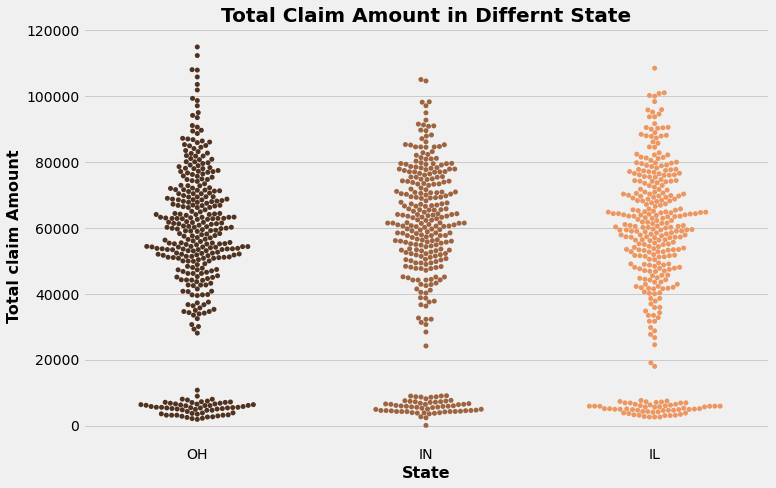

In [45]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (11,7)
sns.swarmplot(df['policy_state'], df['total_claim_amount'], palette = 'copper')
plt.title('Total Claim Amount in Differnt State',fontsize=20,fontweight ='bold')
plt.xlabel('State', fontsize=16,fontweight='bold')
plt.ylabel('Total claim Amount', fontsize=16,fontweight='bold')
plt.show()

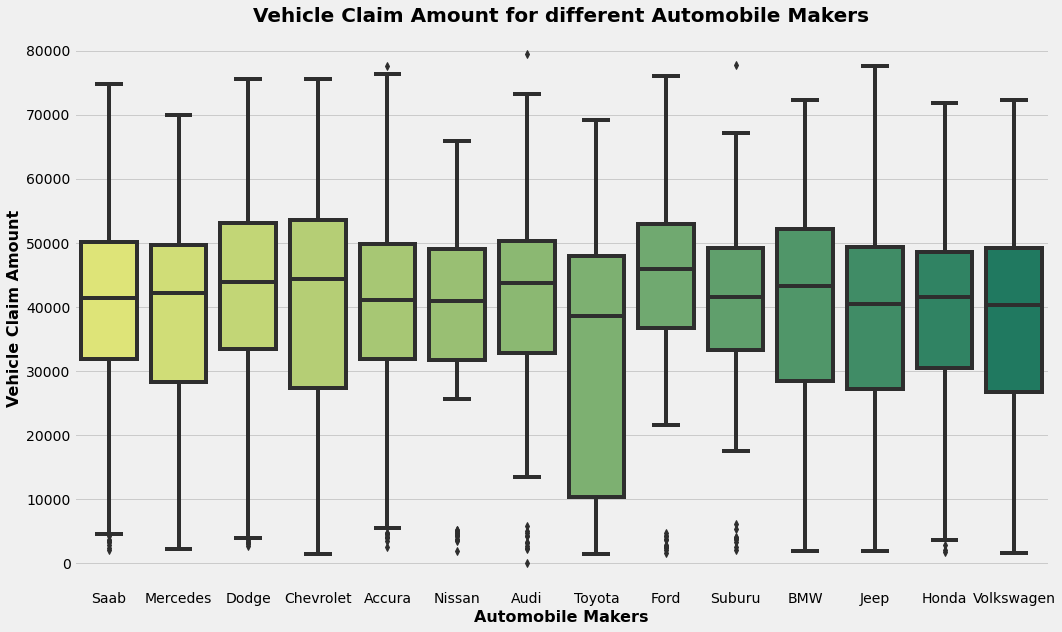

In [46]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15,9)
sns.boxplot(df['auto_make'], df['vehicle_claim'], palette = 'summer_r')
plt.title('Vehicle Claim Amount for different Automobile Makers',fontsize=20,fontweight ='bold')
plt.xlabel('Automobile Makers', fontsize=16,fontweight='bold')
plt.ylabel('Vehicle Claim Amount', fontsize=16,fontweight='bold')
plt.show()

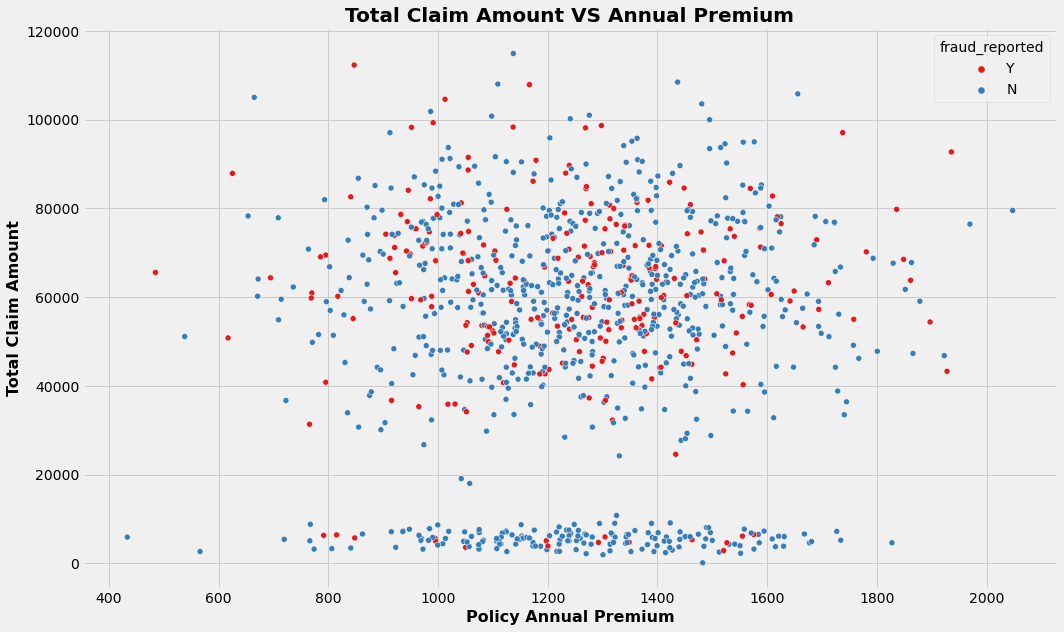

In [47]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15,9)
sns.scatterplot(df['policy_annual_premium'], df['total_claim_amount'], hue=df.fraud_reported, palette = 'Set1')
plt.title('Total Claim Amount VS Annual Premium',fontsize=20,fontweight ='bold')
plt.xlabel('Policy Annual Premium', fontsize=16,fontweight='bold')
plt.ylabel('Total Claim Amount', fontsize=16,fontweight='bold')
plt.show()

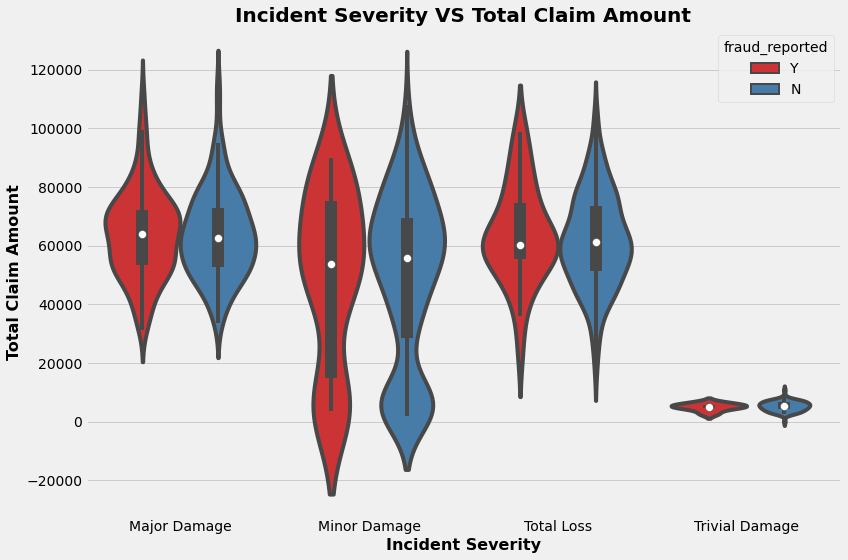

In [48]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (12,8)
sns.violinplot(df['incident_severity'], df['total_claim_amount'], hue=df.fraud_reported, palette = 'Set1')
plt.title('Incident Severity VS Total Claim Amount',fontsize=20,fontweight ='bold')
plt.xlabel('Incident Severity', fontsize=16,fontweight='bold')
plt.ylabel('Total Claim Amount', fontsize=16,fontweight='bold')
plt.show()

In [49]:
pd.set_option('display.max_columns', None) # This will enable us to see truncated columns
df.head()

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported,CSL_Personal,CSL_Accidental,policy_bind_day,policy_bind_month,policy_bind_year,incident_day,incident_month,Automobile_Age,age_bins
0,328,48,OH,1000,1406.91,0,MALE,MD,craft-repair,sleeping,husband,53300,0,Single Vehicle Collision,Side Collision,Major Damage,Police,SC,Columbus,5,1,YES,1,2,YES,71610,6510,13020,52080,Saab,92x,Y,250,500,17,10,2014,25,1,11,41-50
1,228,42,IN,2000,1197.22,5000000,MALE,MD,machine-op-inspct,reading,other-relative,0,0,Vehicle Theft,Rear Collision,Minor Damage,Police,VA,Riverwood,8,1,NO,0,0,NO,5070,780,780,3510,Mercedes,E400,Y,250,500,27,6,2006,21,1,8,41-50
2,134,29,OH,2000,1413.14,5000000,FEMALE,PhD,sales,board-games,own-child,35100,0,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NY,Columbus,7,3,NO,2,3,NO,34650,7700,3850,23100,Dodge,RAM,N,100,300,9,6,2000,22,2,8,21-30
3,256,41,IL,2000,1415.74,6000000,FEMALE,PhD,armed-forces,board-games,unmarried,48900,-62400,Single Vehicle Collision,Front Collision,Major Damage,Police,OH,Arlington,5,1,NO,1,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,Y,250,500,25,5,1990,1,10,1,41-50
4,228,44,IL,1000,1583.91,6000000,MALE,Associate,sales,board-games,unmarried,66000,-46000,Vehicle Theft,Rear Collision,Minor Damage,None,NY,Arlington,20,1,NO,0,1,NO,6500,1300,650,4550,Accura,RSX,N,500,1000,6,6,2014,17,2,6,41-50


# Encoding categorical data

In [50]:
Category = ['policy_state', 'insured_sex', 'insured_education_level', 'insured_occupation',
            'insured_hobbies', 'insured_relationship', 'incident_type', 'collision_type', 'incident_severity',
            'authorities_contacted', 'incident_state', 'incident_city', 'property_damage', 'police_report_available', 
            'auto_make', 'auto_model', 'fraud_reported', 'CSL_Personal', 'CSL_Accidental']

In [51]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in Category:
    df[i] = le.fit_transform(df[i])
df.head()

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported,CSL_Personal,CSL_Accidental,policy_bind_day,policy_bind_month,policy_bind_year,incident_day,incident_month,Automobile_Age,age_bins
0,328,48,2,1000,1406.91,0,1,4,2,17,0,53300,0,2,2,0,4,4,1,5,1,1,1,2,1,71610,6510,13020,52080,10,1,1,1,2,17,10,2014,25,1,11,41-50
1,228,42,1,2000,1197.22,5000000,1,4,6,15,2,0,0,3,1,1,4,5,5,8,1,0,0,0,0,5070,780,780,3510,8,12,1,1,2,27,6,2006,21,1,8,41-50
2,134,29,2,2000,1413.14,5000000,0,6,11,2,3,35100,0,0,1,1,4,1,1,7,3,0,2,3,0,34650,7700,3850,23100,4,30,0,0,1,9,6,2000,22,2,8,21-30
3,256,41,0,2000,1415.74,6000000,0,6,1,2,4,48900,-62400,2,0,0,4,2,0,5,1,0,1,2,0,63400,6340,6340,50720,3,34,1,1,2,25,5,1990,1,10,1,41-50
4,228,44,0,1000,1583.91,6000000,1,0,11,2,4,66000,-46000,3,1,1,2,1,0,20,1,0,0,1,0,6500,1300,650,4550,0,31,0,2,0,6,6,2014,17,2,6,41-50


# Outliers Detection and Removal

In [ ]:
Numerical = ['months_as_customer', 'age', 'policy_deductable', 'umbrella_limit', 'capital-gains', 'capital-loss',
             'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 
             'total_claim_amount','injury_claim', 'property_claim', 'vehicle_claim', 'policy_bind_day', 
             'policy_bind_month', 'policy_bind_year', 'incident_day', 'incident_month', 'Automobile_Age','policy_annual_premium']

In [ ]:
len(Numerical)

In [ ]:
plt.figure(figsize=(20,30),facecolor='white')
plotnumber=1

for column in Numerical:
    if plotnumber<=21:
        ax=plt.subplot(7,3,plotnumber)
        sns.boxplot(df[column],color='y')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

# Skewness of features

In [ ]:
plt.figure(figsize=(20,30),facecolor='white')
sns.set_palette('plasma')
plotnum=1
for col in Numerical:
    if plotnum<=21:
        plt.subplot(7,3,plotnum)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=20)
    plotnum+=1
plt.show()

In [54]:
df[Numerical].skew()

months_as_customer             0.362177
CSL_Personal                   0.088928
CSL_Accidental                -0.092720
age                            0.478988
policy_deductable              0.477887
umbrella_limit                 1.806712
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
Automobile_Age                 0.048289
policy_annual_premium          0.004402
dtype: float64

In [55]:
skew=['total_claim_amount','vehicle_claim']
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
df[skew] = scaler.fit_transform(df[skew].values)

In [56]:
df[skew].skew()

total_claim_amount   -0.510354
vehicle_claim        -0.522718
dtype: float64

# Corrleation

In [57]:
df.corr()

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,capital-loss,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported,CSL_Personal,CSL_Accidental,policy_bind_day,policy_bind_month,policy_bind_year,incident_day,incident_month,Automobile_Age
months_as_customer,1.000000,0.922098,-0.000328,0.026807,0.005018,0.015498,0.060925,-0.000833,0.009814,-0.093661,0.069727,0.006399,0.020209,-0.017377,-0.072787,-0.059581,0.010021,0.005369,-0.000130,0.070639,0.014736,0.005488,-0.010162,0.058383,-0.022146,0.062495,0.065329,0.034940,0.061308,0.047655,0.004202,0.020544,-0.026819,0.008876,0.051728,0.005750,-0.048276,-0.011092,0.024659,0.000292
age,0.922098,1.000000,-0.014533,0.029188,0.014404,0.018126,0.073337,0.000969,0.017220,-0.081315,0.074832,-0.007075,0.007368,-0.025626,-0.075642,-0.058439,0.015417,0.005770,-0.002291,0.087161,0.022102,-0.003408,-0.015679,0.052359,-0.020441,0.070386,0.075522,0.060898,0.062764,0.030410,0.017343,0.012143,-0.015185,0.009876,0.053869,0.015501,-0.037444,-0.006131,0.023404,-0.001354
policy_state,-0.000328,-0.014533,1.000000,0.010033,0.012455,-0.029580,-0.020481,-0.034327,-0.031215,-0.038689,-0.018506,0.074551,-0.030338,0.031848,0.052438,-0.026377,-0.016777,0.008723,-0.002077,0.029457,-0.042263,-0.008465,0.013384,0.022960,0.069017,-0.006305,-0.046290,0.008406,0.001464,0.017124,-0.025253,0.029432,0.001027,0.028838,0.002277,0.071450,-0.007276,0.014745,0.023643,-0.002114
policy_deductable,0.026807,0.029188,0.010033,1.000000,-0.003245,0.010870,-0.009733,0.015217,-0.046733,0.004061,-0.022945,0.035212,-0.023544,-0.038411,-0.053912,-0.015711,-0.000760,0.006517,-0.045117,0.060935,0.051214,0.015770,-0.022765,0.066639,0.038036,0.023350,0.039107,0.064792,0.004875,-0.035379,-0.003268,0.014817,0.003384,-0.003931,0.009164,-0.050416,-0.049598,-0.018160,-0.006418,-0.026105
policy_annual_premium,0.005018,0.014404,0.012455,-0.003245,1.000000,-0.006247,0.038853,-0.019715,0.035922,-0.018019,0.001925,-0.013738,0.023547,0.053603,0.036556,-0.011155,-0.055191,0.046434,0.048724,-0.001578,-0.045991,0.080738,0.026780,0.002332,0.021998,0.008400,-0.017633,-0.011654,0.020028,0.000045,-0.031849,-0.014480,0.023978,0.003813,-0.025183,-0.035355,0.001249,0.014835,0.021559,0.049226
umbrella_limit,0.015498,0.018126,-0.029580,0.010870,-0.006247,1.000000,0.010688,-0.019357,0.023422,-0.037000,0.077495,-0.047268,-0.024056,0.015966,0.010041,0.009466,0.029044,-0.077492,0.013094,-0.023257,-0.021270,-0.076358,0.022743,-0.006738,-0.044771,-0.040182,-0.045412,-0.023790,-0.038275,-0.004443,0.040256,0.058622,0.021636,0.015602,-0.045207,0.009961,0.048008,-0.021716,0.042409,-0.009893
insured_sex,0.060925,0.073337,-0.020481,-0.009733,0.038853,0.010688,1.000000,0.009002,-0.006160,-0.020317,0.002855,-0.020494,-0.021705,0.009952,-0.014293,-0.028168,0.017914,-0.022379,0.014470,0.019290,0.018793,0.026969,-0.020297,0.042463,0.006992,-0.024532,0.000924,-0.014868,-0.030626,0.026457,-0.018421,0.030873,-0.010757,0.070700,0.040713,-0.004033,-0.032891,-0.007280,0.024227,0.028247
insured_education_level,-0.000833,0.000969,-0.034327,0.015217,-0.019715,-0.019357,0.009002,1.000000,-0.020298,0.021807,-0.023488,0.039912,0.041193,0.013704,-0.019230,-0.006420,-0.010838,-0.005903,-0.018636,-0.057061,-0.003768,-0.048909,-0.012072,0.019211,0.051640,0.074466,0.081880,0.055794,0.068308,0.055202,0.049445,0.008808,0.009153,-0.006546,0.012610,-0.007118,0.018952,-0.058104,0.075083,-0.043509
insured_occupation,0.009814,0.017220,-0.031215,-0.046733,0.035922,0.023422,-0.006160,-0.020298,1.000000,-0.011077,-0.010171,-0.007824,-0.020171,0.003842,0.007401,0.004731,-0.007811,-0.022761,0.000390,-0.018435,

In [93]:
df._get_numeric_data().head().T

,0,1,2,3,4
months_as_customer,328.000000,2.280000e+02,1.340000e+02,2.560000e+02,2.280000e+02
age,48.000000,4.200000e+01,2.900000e+01,4.100000e+01,4.400000e+01
policy_state,2.000000,1.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00
policy_deductable,1000.000000,2.000000e+03,2.000000e+03,2.000000e+03,1.000000e+03
policy_annual_premium,1406.910000,1.197220e+03,1.413140e+03,1.415740e+03,1.583910e+03
umbrella_limit,0.000000,5.000000e+06,5.000000e+06,6.000000e+06,6.000000e+06
insured_sex,1.000000,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
insured_education_level,4.000000,4.000000e+00,6.000000e+00,6.000000e+00,0.000000e+00
insured_occupation,2.000000,6.000000e+00,1.100000e+01,1.000000e+00,1.100000e+01
insured_hobbies,17.000000,1.500000e+01,2.000000e+00,2.000000e+00,2.000000e+00


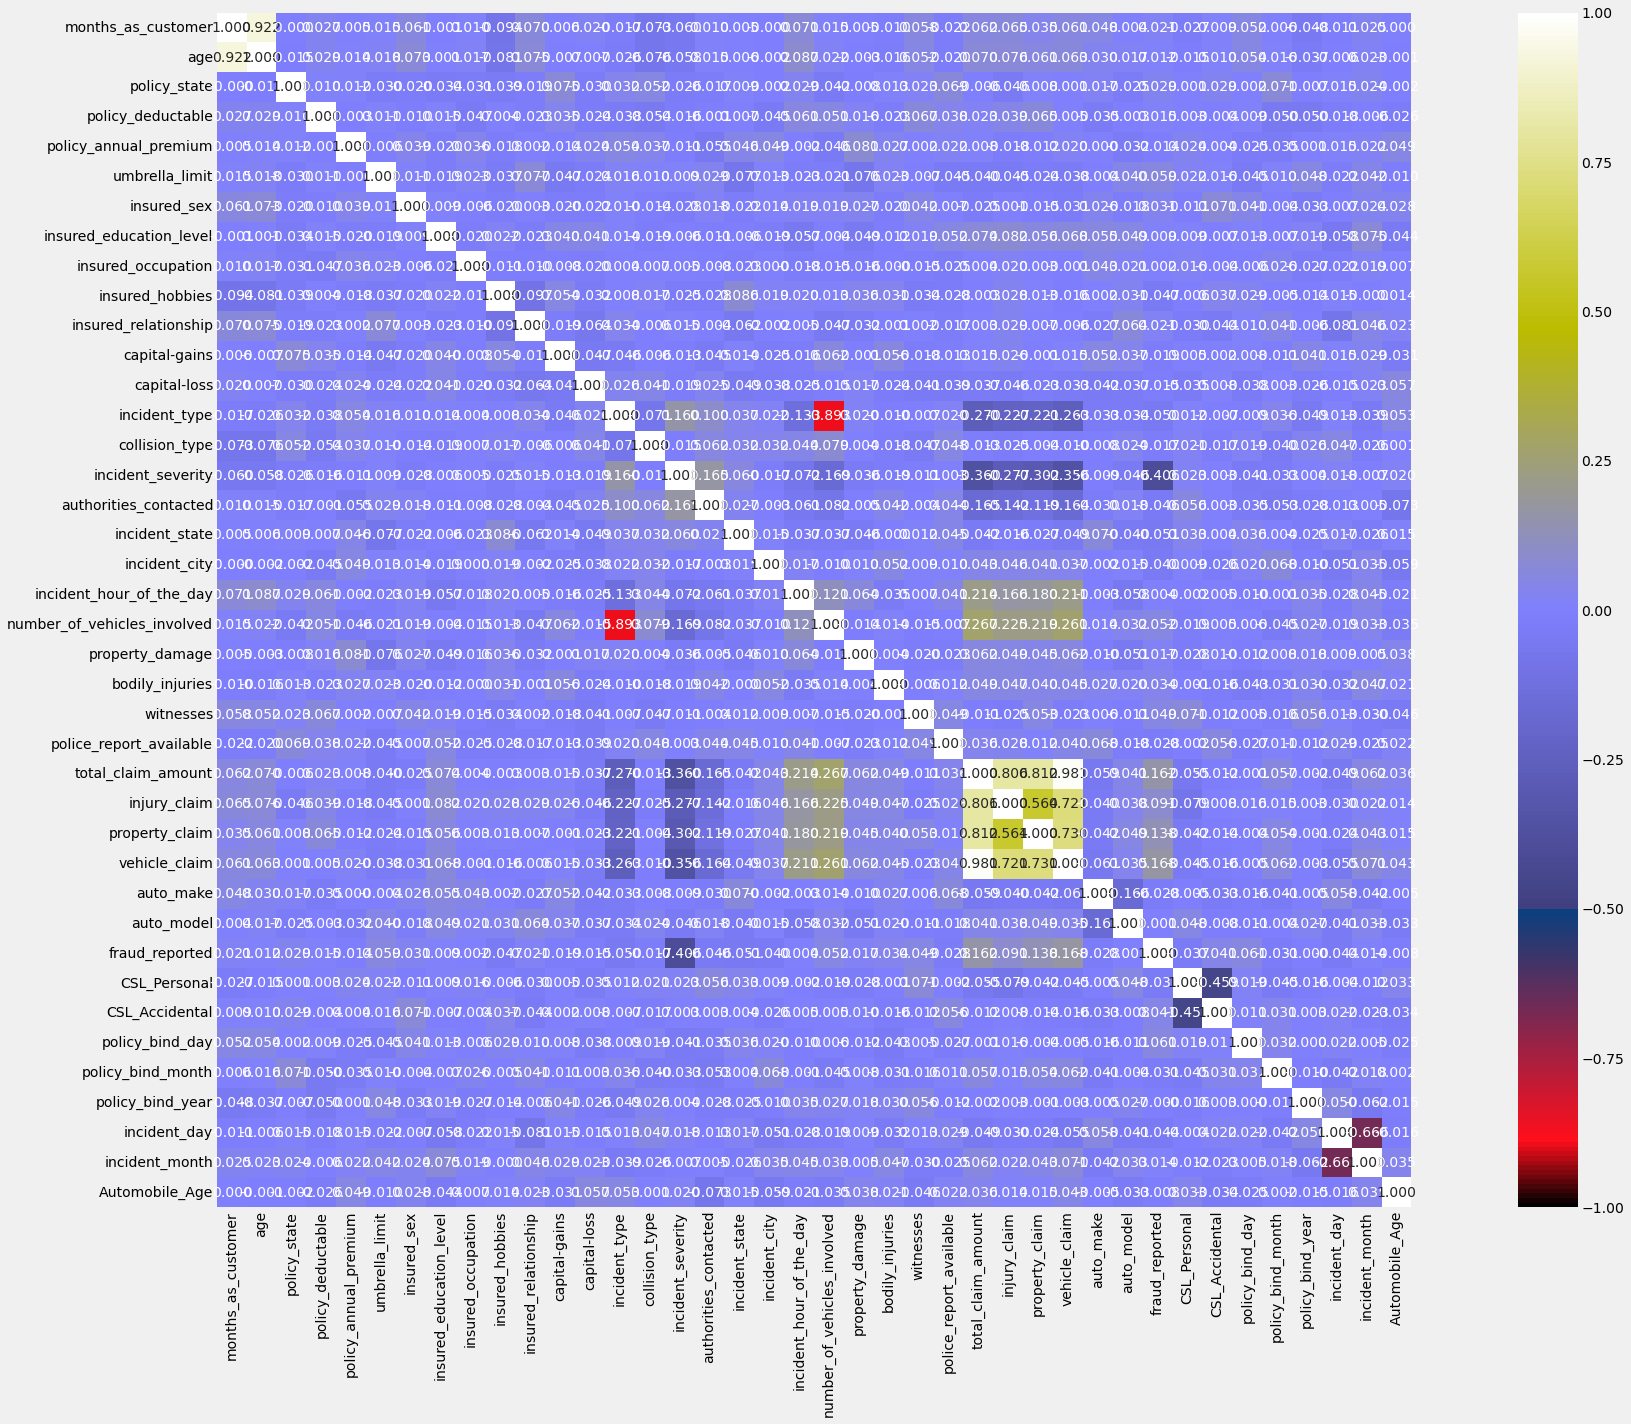

In [58]:
plt.figure(figsize=(30,20))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', cmap="gist_stern")
plt.show()

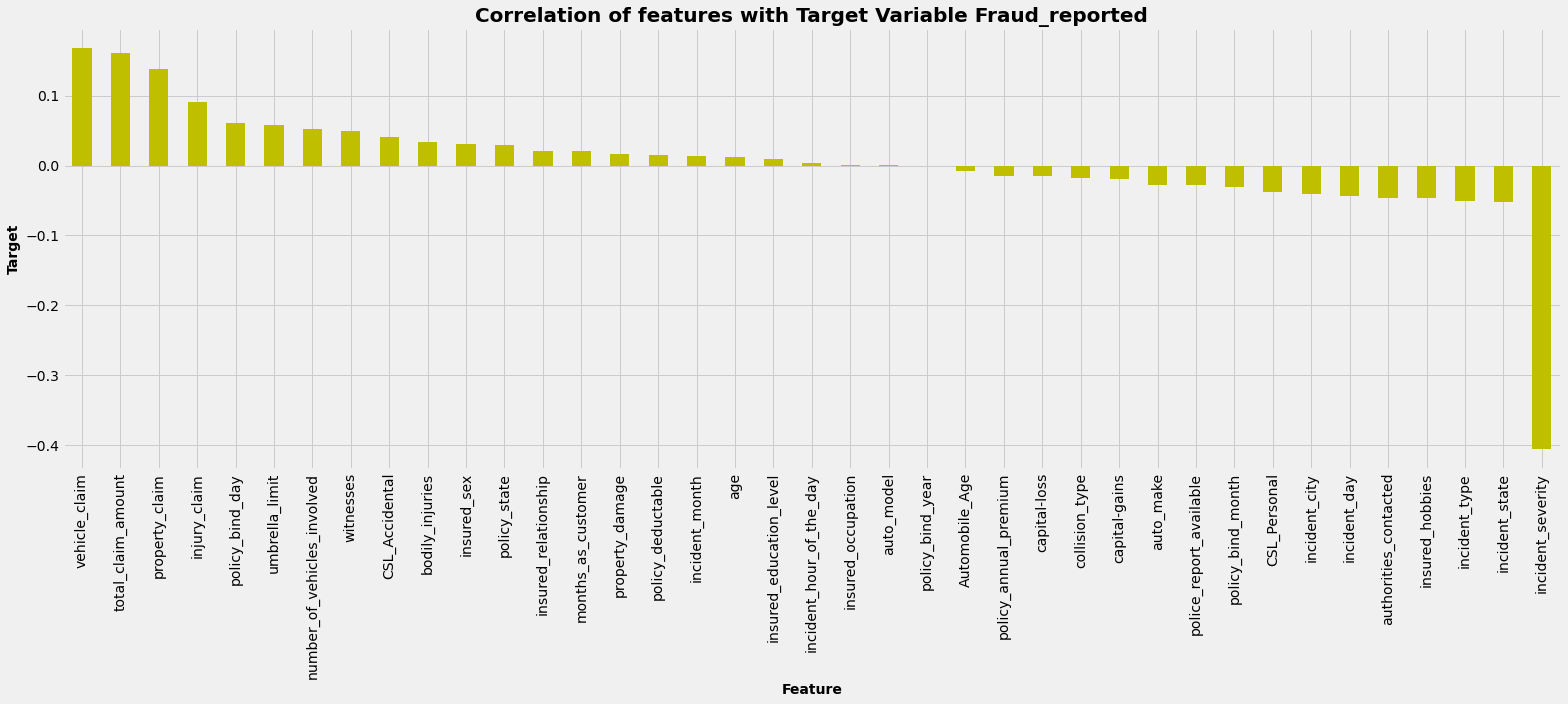

In [59]:
plt.figure(figsize=(22,10))
df.corr()['fraud_reported'].sort_values(ascending=False).drop(['fraud_reported']).plot(kind='bar',color='y')
plt.xlabel('Feature',fontsize=14,fontweight='bold')
plt.ylabel('Target',fontsize=14,fontweight='bold')
plt.title('Correlation of features with Target Variable Fraud_reported',fontsize=20,fontweight='bold')
plt.show()

# Balanceing Imbalanced target feature

In [60]:
df.fraud_reported.value_counts()

0    753
1    247
Name: fraud_reported, dtype: int64

In [61]:
from imblearn.over_sampling import SMOTE

In [62]:
X = df.drop(['fraud_reported'], axis =1)
Y = df['fraud_reported']

In [64]:
Y.value_counts()

0    753
1    247
Name: fraud_reported, dtype: int64

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X_scale,i) for i in range(len(X.columns))]
vif["Features"] = X.columns
vif

# Machine Learning Model Building

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

In [71]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=99, test_size=.3)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (700, 40)
Training target vector size: (700,)
Test feature matrix size: (300, 40)
Test target vector size: (300,)


# Applying other classification algorithm

In [ ]:
model=[ LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 3),
        RandomForestClassifier(),
        ExtraTreesClassifier()]
        
for m in model:
    m.fit(X_train,Y_train)
    y_pred=m.predict(X_test)
    print('\033[1m'+'Classification ML Algorithm Evaluation Matrix',m,'is' +'\033[0m')
    print('\n')
    print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Confusion matrix :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Classification Report :'+'\033[0m \n',classification_report(Y_test, y_pred))
    print('\n')
    print('============================================================================================================')

# CrossValidation

In [76]:
from sklearn.model_selection import cross_val_score
model=[LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 3),
        RandomForestClassifier(),
        ExtraTreesClassifier()]

for m in model:
    score = cross_val_score(m, X, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score', m, ':'+'\033[0m\n')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("Std deviation :",score.std())
    print('\n')
    print('============================================================================================================')



Cross Validation Score LogisticRegression() :

Score : [nan nan nan nan nan]
Mean Score : nan
Std deviation : nan




Cross Validation Score SVC() :

Score : [nan nan nan nan nan]
Mean Score : nan
Std deviation : nan




Cross Validation Score GaussianNB() :

Score : [nan nan nan nan nan]
Mean Score : nan
Std deviation : nan




Cross Validation Score DecisionTreeClassifier() :

Score : [nan nan nan nan nan]
Mean Score : nan
Std deviation : nan




Cross Validation Score KNeighborsClassifier(n_neighbors=3) :

Score : [nan nan nan nan nan]
Mean Score : nan
Std deviation : nan




Cross Validation Score RandomForestClassifier() :

Score : [nan nan nan nan nan]
Mean Score : nan
Std deviation : nan




Cross Validation Score ExtraTreesClassifier() :

Score : [nan nan nan nan nan]
Mean Score : nan
Std deviation : nan




# Hyper Parameter Tuning : GridSearchCV

In [77]:
from sklearn.model_selection import GridSearchCV

In [78]:
parameter= {'criterion' : ['gini', 'entropy'],
             'max_features':['auto','sqrt','log2'],
              'min_samples_split':[3,5,8,11],
              'max_depth' : [10,20,30],
              'n_estimators' : [100,200,300,400]
             }

In [79]:
GCV = GridSearchCV(ExtraTreesClassifier(),parameter,verbose=10)
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[CV 1/5; 1/288] START criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=100
[CV 1/5; 1/288] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=100;, score=nan total time=   0.0s
[CV 2/5; 1/288] START criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=100
[CV 2/5; 1/288] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=100;, score=nan total time=   0.0s
[CV 3/5; 1/288] START criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=100
[CV 3/5; 1/288] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=100;, score=nan total time=   0.0s
[CV 4/5; 1/288] START criterion=gini, max_depth=10, max_features=auto, min_samples_split=3, n_estimators=100
[CV 4/5; 1/288] END criterion=gini, max_depth=10, max_features=auto, min_samples_split

[CV 2/5; 9/288] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=8, n_estimators=100;, score=nan total time=   0.0s
[CV 3/5; 9/288] START criterion=gini, max_depth=10, max_features=auto, min_samples_split=8, n_estimators=100
[CV 3/5; 9/288] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=8, n_estimators=100;, score=nan total time=   0.0s
[CV 4/5; 9/288] START criterion=gini, max_depth=10, max_features=auto, min_samples_split=8, n_estimators=100
[CV 4/5; 9/288] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=8, n_estimators=100;, score=nan total time=   0.0s
[CV 5/5; 9/288] START criterion=gini, max_depth=10, max_features=auto, min_samples_split=8, n_estimators=100
[CV 5/5; 9/288] END criterion=gini, max_depth=10, max_features=auto, min_samples_split=8, n_estimators=100;, score=nan total time=   0.0s
[CV 1/5; 10/288] START criterion=gini, max_depth=10, max_features=auto, min_samples_split=8, n_estimators=200
[CV 1/5; 10

[CV 1/5; 17/288] START criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=3, n_estimators=100
[CV 1/5; 17/288] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=3, n_estimators=100;, score=nan total time=   0.0s
[CV 2/5; 17/288] START criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=3, n_estimators=100
[CV 2/5; 17/288] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=3, n_estimators=100;, score=nan total time=   0.0s
[CV 3/5; 17/288] START criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=3, n_estimators=100
[CV 3/5; 17/288] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=3, n_estimators=100;, score=nan total time=   0.0s
[CV 4/5; 17/288] START criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=3, n_estimators=100
[CV 4/5; 17/288] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=3, n_estimators=100;, score=nan total time=   0.0s
[CV 

[CV 4/5; 23/288] START criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=300
[CV 4/5; 23/288] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=300;, score=nan total time=   0.0s
[CV 5/5; 23/288] START criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=300
[CV 5/5; 23/288] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=300;, score=nan total time=   0.0s
[CV 1/5; 24/288] START criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=400
[CV 1/5; 24/288] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=400;, score=nan total time=   0.0s
[CV 2/5; 24/288] START criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=400
[CV 2/5; 24/288] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=400;, score=nan total time=   0.0s
[CV 

[CV 5/5; 30/288] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=11, n_estimators=200;, score=nan total time=   0.0s
[CV 1/5; 31/288] START criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=11, n_estimators=300
[CV 1/5; 31/288] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=11, n_estimators=300;, score=nan total time=   0.0s
[CV 2/5; 31/288] START criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=11, n_estimators=300
[CV 2/5; 31/288] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=11, n_estimators=300;, score=nan total time=   0.0s
[CV 3/5; 31/288] START criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=11, n_estimators=300
[CV 3/5; 31/288] END criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=11, n_estimators=300;, score=nan total time=   0.0s
[CV 4/5; 31/288] START criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=11, n_estimators=

[CV 3/5; 38/288] END criterion=gini, max_depth=10, max_features=log2, min_samples_split=5, n_estimators=200;, score=nan total time=   0.0s
[CV 4/5; 38/288] START criterion=gini, max_depth=10, max_features=log2, min_samples_split=5, n_estimators=200
[CV 4/5; 38/288] END criterion=gini, max_depth=10, max_features=log2, min_samples_split=5, n_estimators=200;, score=nan total time=   0.0s
[CV 5/5; 38/288] START criterion=gini, max_depth=10, max_features=log2, min_samples_split=5, n_estimators=200
[CV 5/5; 38/288] END criterion=gini, max_depth=10, max_features=log2, min_samples_split=5, n_estimators=200;, score=nan total time=   0.0s
[CV 1/5; 39/288] START criterion=gini, max_depth=10, max_features=log2, min_samples_split=5, n_estimators=300
[CV 1/5; 39/288] END criterion=gini, max_depth=10, max_features=log2, min_samples_split=5, n_estimators=300;, score=nan total time=   0.0s
[CV 2/5; 39/288] START criterion=gini, max_depth=10, max_features=log2, min_samples_split=5, n_estimators=300
[CV 

[CV 2/5; 46/288] END criterion=gini, max_depth=10, max_features=log2, min_samples_split=11, n_estimators=200;, score=nan total time=   0.0s
[CV 3/5; 46/288] START criterion=gini, max_depth=10, max_features=log2, min_samples_split=11, n_estimators=200
[CV 3/5; 46/288] END criterion=gini, max_depth=10, max_features=log2, min_samples_split=11, n_estimators=200;, score=nan total time=   0.0s
[CV 4/5; 46/288] START criterion=gini, max_depth=10, max_features=log2, min_samples_split=11, n_estimators=200
[CV 4/5; 46/288] END criterion=gini, max_depth=10, max_features=log2, min_samples_split=11, n_estimators=200;, score=nan total time=   0.0s
[CV 5/5; 46/288] START criterion=gini, max_depth=10, max_features=log2, min_samples_split=11, n_estimators=200
[CV 5/5; 46/288] END criterion=gini, max_depth=10, max_features=log2, min_samples_split=11, n_estimators=200;, score=nan total time=   0.0s
[CV 1/5; 47/288] START criterion=gini, max_depth=10, max_features=log2, min_samples_split=11, n_estimators=

[CV 3/5; 54/288] END criterion=gini, max_depth=20, max_features=auto, min_samples_split=5, n_estimators=200;, score=nan total time=   0.0s
[CV 4/5; 54/288] START criterion=gini, max_depth=20, max_features=auto, min_samples_split=5, n_estimators=200
[CV 4/5; 54/288] END criterion=gini, max_depth=20, max_features=auto, min_samples_split=5, n_estimators=200;, score=nan total time=   0.0s
[CV 5/5; 54/288] START criterion=gini, max_depth=20, max_features=auto, min_samples_split=5, n_estimators=200
[CV 5/5; 54/288] END criterion=gini, max_depth=20, max_features=auto, min_samples_split=5, n_estimators=200;, score=nan total time=   0.0s
[CV 1/5; 55/288] START criterion=gini, max_depth=20, max_features=auto, min_samples_split=5, n_estimators=300
[CV 1/5; 55/288] END criterion=gini, max_depth=20, max_features=auto, min_samples_split=5, n_estimators=300;, score=nan total time=   0.0s
[CV 2/5; 55/288] START criterion=gini, max_depth=20, max_features=auto, min_samples_split=5, n_estimators=300
[CV 

[CV 3/5; 63/288] START criterion=gini, max_depth=20, max_features=auto, min_samples_split=11, n_estimators=300
[CV 3/5; 63/288] END criterion=gini, max_depth=20, max_features=auto, min_samples_split=11, n_estimators=300;, score=nan total time=   0.0s
[CV 4/5; 63/288] START criterion=gini, max_depth=20, max_features=auto, min_samples_split=11, n_estimators=300
[CV 4/5; 63/288] END criterion=gini, max_depth=20, max_features=auto, min_samples_split=11, n_estimators=300;, score=nan total time=   0.0s
[CV 5/5; 63/288] START criterion=gini, max_depth=20, max_features=auto, min_samples_split=11, n_estimators=300
[CV 5/5; 63/288] END criterion=gini, max_depth=20, max_features=auto, min_samples_split=11, n_estimators=300;, score=nan total time=   0.0s
[CV 1/5; 64/288] START criterion=gini, max_depth=20, max_features=auto, min_samples_split=11, n_estimators=400
[CV 1/5; 64/288] END criterion=gini, max_depth=20, max_features=auto, min_samples_split=11, n_estimators=400;, score=nan total time=   0

[CV 5/5; 71/288] START criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=5, n_estimators=300
[CV 5/5; 71/288] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=5, n_estimators=300;, score=nan total time=   0.0s
[CV 1/5; 72/288] START criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=5, n_estimators=400
[CV 1/5; 72/288] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=5, n_estimators=400;, score=nan total time=   0.0s
[CV 2/5; 72/288] START criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=5, n_estimators=400
[CV 2/5; 72/288] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=5, n_estimators=400;, score=nan total time=   0.0s
[CV 3/5; 72/288] START criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=5, n_estimators=400
[CV 3/5; 72/288] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=5, n_estimators=400;, score=nan total time=   0.0s
[CV 

[CV 5/5; 79/288] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=11, n_estimators=300;, score=nan total time=   0.0s
[CV 1/5; 80/288] START criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=11, n_estimators=400
[CV 1/5; 80/288] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=11, n_estimators=400;, score=nan total time=   0.0s
[CV 2/5; 80/288] START criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=11, n_estimators=400
[CV 2/5; 80/288] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=11, n_estimators=400;, score=nan total time=   0.0s
[CV 3/5; 80/288] START criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=11, n_estimators=400
[CV 3/5; 80/288] END criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=11, n_estimators=400;, score=nan total time=   0.0s
[CV 4/5; 80/288] START criterion=gini, max_depth=20, max_features=sqrt, min_samples_split=11, n_estimators=

[CV 5/5; 87/288] END criterion=gini, max_depth=20, max_features=log2, min_samples_split=5, n_estimators=300;, score=nan total time=   0.0s
[CV 1/5; 88/288] START criterion=gini, max_depth=20, max_features=log2, min_samples_split=5, n_estimators=400
[CV 1/5; 88/288] END criterion=gini, max_depth=20, max_features=log2, min_samples_split=5, n_estimators=400;, score=nan total time=   0.0s
[CV 2/5; 88/288] START criterion=gini, max_depth=20, max_features=log2, min_samples_split=5, n_estimators=400
[CV 2/5; 88/288] END criterion=gini, max_depth=20, max_features=log2, min_samples_split=5, n_estimators=400;, score=nan total time=   0.0s
[CV 3/5; 88/288] START criterion=gini, max_depth=20, max_features=log2, min_samples_split=5, n_estimators=400
[CV 3/5; 88/288] END criterion=gini, max_depth=20, max_features=log2, min_samples_split=5, n_estimators=400;, score=nan total time=   0.0s
[CV 4/5; 88/288] START criterion=gini, max_depth=20, max_features=log2, min_samples_split=5, n_estimators=400
[CV 

[CV 1/5; 96/288] END criterion=gini, max_depth=20, max_features=log2, min_samples_split=11, n_estimators=400;, score=nan total time=   0.0s
[CV 2/5; 96/288] START criterion=gini, max_depth=20, max_features=log2, min_samples_split=11, n_estimators=400
[CV 2/5; 96/288] END criterion=gini, max_depth=20, max_features=log2, min_samples_split=11, n_estimators=400;, score=nan total time=   0.0s
[CV 3/5; 96/288] START criterion=gini, max_depth=20, max_features=log2, min_samples_split=11, n_estimators=400
[CV 3/5; 96/288] END criterion=gini, max_depth=20, max_features=log2, min_samples_split=11, n_estimators=400;, score=nan total time=   0.0s
[CV 4/5; 96/288] START criterion=gini, max_depth=20, max_features=log2, min_samples_split=11, n_estimators=400
[CV 4/5; 96/288] END criterion=gini, max_depth=20, max_features=log2, min_samples_split=11, n_estimators=400;, score=nan total time=   0.0s
[CV 5/5; 96/288] START criterion=gini, max_depth=20, max_features=log2, min_samples_split=11, n_estimators=

[CV 3/5; 104/288] END criterion=gini, max_depth=30, max_features=auto, min_samples_split=5, n_estimators=400;, score=nan total time=   0.0s
[CV 4/5; 104/288] START criterion=gini, max_depth=30, max_features=auto, min_samples_split=5, n_estimators=400
[CV 4/5; 104/288] END criterion=gini, max_depth=30, max_features=auto, min_samples_split=5, n_estimators=400;, score=nan total time=   0.0s
[CV 5/5; 104/288] START criterion=gini, max_depth=30, max_features=auto, min_samples_split=5, n_estimators=400
[CV 5/5; 104/288] END criterion=gini, max_depth=30, max_features=auto, min_samples_split=5, n_estimators=400;, score=nan total time=   0.0s
[CV 1/5; 105/288] START criterion=gini, max_depth=30, max_features=auto, min_samples_split=8, n_estimators=100
[CV 1/5; 105/288] END criterion=gini, max_depth=30, max_features=auto, min_samples_split=8, n_estimators=100;, score=nan total time=   0.0s
[CV 2/5; 105/288] START criterion=gini, max_depth=30, max_features=auto, min_samples_split=8, n_estimators=

[CV 1/5; 112/288] END criterion=gini, max_depth=30, max_features=auto, min_samples_split=11, n_estimators=400;, score=nan total time=   0.0s
[CV 2/5; 112/288] START criterion=gini, max_depth=30, max_features=auto, min_samples_split=11, n_estimators=400
[CV 2/5; 112/288] END criterion=gini, max_depth=30, max_features=auto, min_samples_split=11, n_estimators=400;, score=nan total time=   0.0s
[CV 3/5; 112/288] START criterion=gini, max_depth=30, max_features=auto, min_samples_split=11, n_estimators=400
[CV 3/5; 112/288] END criterion=gini, max_depth=30, max_features=auto, min_samples_split=11, n_estimators=400;, score=nan total time=   0.0s
[CV 4/5; 112/288] START criterion=gini, max_depth=30, max_features=auto, min_samples_split=11, n_estimators=400
[CV 4/5; 112/288] END criterion=gini, max_depth=30, max_features=auto, min_samples_split=11, n_estimators=400;, score=nan total time=   0.0s
[CV 5/5; 112/288] START criterion=gini, max_depth=30, max_features=auto, min_samples_split=11, n_est

[CV 4/5; 120/288] END criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=5, n_estimators=400;, score=nan total time=   0.0s
[CV 5/5; 120/288] START criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=5, n_estimators=400
[CV 5/5; 120/288] END criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=5, n_estimators=400;, score=nan total time=   0.0s
[CV 1/5; 121/288] START criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=8, n_estimators=100
[CV 1/5; 121/288] END criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=8, n_estimators=100;, score=nan total time=   0.0s
[CV 2/5; 121/288] START criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=8, n_estimators=100
[CV 2/5; 121/288] END criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=8, n_estimators=100;, score=nan total time=   0.0s
[CV 3/5; 121/288] START criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=8, n_estimators=

[CV 3/5; 128/288] END criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=11, n_estimators=400;, score=nan total time=   0.0s
[CV 4/5; 128/288] START criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=11, n_estimators=400
[CV 4/5; 128/288] END criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=11, n_estimators=400;, score=nan total time=   0.0s
[CV 5/5; 128/288] START criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=11, n_estimators=400
[CV 5/5; 128/288] END criterion=gini, max_depth=30, max_features=sqrt, min_samples_split=11, n_estimators=400;, score=nan total time=   0.0s
[CV 1/5; 129/288] START criterion=gini, max_depth=30, max_features=log2, min_samples_split=3, n_estimators=100
[CV 1/5; 129/288] END criterion=gini, max_depth=30, max_features=log2, min_samples_split=3, n_estimators=100;, score=nan total time=   0.0s
[CV 2/5; 129/288] START criterion=gini, max_depth=30, max_features=log2, min_samples_split=3, n_estima

[CV 2/5; 136/288] END criterion=gini, max_depth=30, max_features=log2, min_samples_split=5, n_estimators=400;, score=nan total time=   0.0s
[CV 3/5; 136/288] START criterion=gini, max_depth=30, max_features=log2, min_samples_split=5, n_estimators=400
[CV 3/5; 136/288] END criterion=gini, max_depth=30, max_features=log2, min_samples_split=5, n_estimators=400;, score=nan total time=   0.0s
[CV 4/5; 136/288] START criterion=gini, max_depth=30, max_features=log2, min_samples_split=5, n_estimators=400
[CV 4/5; 136/288] END criterion=gini, max_depth=30, max_features=log2, min_samples_split=5, n_estimators=400;, score=nan total time=   0.0s
[CV 5/5; 136/288] START criterion=gini, max_depth=30, max_features=log2, min_samples_split=5, n_estimators=400
[CV 5/5; 136/288] END criterion=gini, max_depth=30, max_features=log2, min_samples_split=5, n_estimators=400;, score=nan total time=   0.0s
[CV 1/5; 137/288] START criterion=gini, max_depth=30, max_features=log2, min_samples_split=8, n_estimators=

[CV 4/5; 143/288] END criterion=gini, max_depth=30, max_features=log2, min_samples_split=11, n_estimators=300;, score=nan total time=   0.0s
[CV 5/5; 143/288] START criterion=gini, max_depth=30, max_features=log2, min_samples_split=11, n_estimators=300
[CV 5/5; 143/288] END criterion=gini, max_depth=30, max_features=log2, min_samples_split=11, n_estimators=300;, score=nan total time=   0.0s
[CV 1/5; 144/288] START criterion=gini, max_depth=30, max_features=log2, min_samples_split=11, n_estimators=400
[CV 1/5; 144/288] END criterion=gini, max_depth=30, max_features=log2, min_samples_split=11, n_estimators=400;, score=nan total time=   0.0s
[CV 2/5; 144/288] START criterion=gini, max_depth=30, max_features=log2, min_samples_split=11, n_estimators=400
[CV 2/5; 144/288] END criterion=gini, max_depth=30, max_features=log2, min_samples_split=11, n_estimators=400;, score=nan total time=   0.0s
[CV 3/5; 144/288] START criterion=gini, max_depth=30, max_features=log2, min_samples_split=11, n_est

[CV 2/5; 151/288] END criterion=entropy, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=300;, score=nan total time=   0.0s
[CV 3/5; 151/288] START criterion=entropy, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=300
[CV 3/5; 151/288] END criterion=entropy, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=300;, score=nan total time=   0.0s
[CV 4/5; 151/288] START criterion=entropy, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=300
[CV 4/5; 151/288] END criterion=entropy, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=300;, score=nan total time=   0.0s
[CV 5/5; 151/288] START criterion=entropy, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=300
[CV 5/5; 151/288] END criterion=entropy, max_depth=10, max_features=auto, min_samples_split=5, n_estimators=300;, score=nan total time=   0.0s
[CV 1/5; 152/288] START criterion=entropy, max_depth=10, max_features=auto, min_sample

[CV 5/5; 159/288] START criterion=entropy, max_depth=10, max_features=auto, min_samples_split=11, n_estimators=300
[CV 5/5; 159/288] END criterion=entropy, max_depth=10, max_features=auto, min_samples_split=11, n_estimators=300;, score=nan total time=   0.0s
[CV 1/5; 160/288] START criterion=entropy, max_depth=10, max_features=auto, min_samples_split=11, n_estimators=400
[CV 1/5; 160/288] END criterion=entropy, max_depth=10, max_features=auto, min_samples_split=11, n_estimators=400;, score=nan total time=   0.0s
[CV 2/5; 160/288] START criterion=entropy, max_depth=10, max_features=auto, min_samples_split=11, n_estimators=400
[CV 2/5; 160/288] END criterion=entropy, max_depth=10, max_features=auto, min_samples_split=11, n_estimators=400;, score=nan total time=   0.0s
[CV 3/5; 160/288] START criterion=entropy, max_depth=10, max_features=auto, min_samples_split=11, n_estimators=400
[CV 3/5; 160/288] END criterion=entropy, max_depth=10, max_features=auto, min_samples_split=11, n_estimators

[CV 1/5; 168/288] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=400;, score=nan total time=   0.0s
[CV 2/5; 168/288] START criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=400
[CV 2/5; 168/288] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=400;, score=nan total time=   0.0s
[CV 3/5; 168/288] START criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=400
[CV 3/5; 168/288] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=400;, score=nan total time=   0.0s
[CV 4/5; 168/288] START criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=400
[CV 4/5; 168/288] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=5, n_estimators=400;, score=nan total time=   0.0s
[CV 5/5; 168/288] START criterion=entropy, max_depth=10, max_features=sqrt, min_sample

[CV 1/5; 176/288] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=11, n_estimators=400;, score=nan total time=   0.0s
[CV 2/5; 176/288] START criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=11, n_estimators=400
[CV 2/5; 176/288] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=11, n_estimators=400;, score=nan total time=   0.0s
[CV 3/5; 176/288] START criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=11, n_estimators=400
[CV 3/5; 176/288] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=11, n_estimators=400;, score=nan total time=   0.0s
[CV 4/5; 176/288] START criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=11, n_estimators=400
[CV 4/5; 176/288] END criterion=entropy, max_depth=10, max_features=sqrt, min_samples_split=11, n_estimators=400;, score=nan total time=   0.0s
[CV 5/5; 176/288] START criterion=entropy, max_depth=10, max_features=sqrt, min

[CV 2/5; 184/288] END criterion=entropy, max_depth=10, max_features=log2, min_samples_split=5, n_estimators=400;, score=nan total time=   0.0s
[CV 3/5; 184/288] START criterion=entropy, max_depth=10, max_features=log2, min_samples_split=5, n_estimators=400
[CV 3/5; 184/288] END criterion=entropy, max_depth=10, max_features=log2, min_samples_split=5, n_estimators=400;, score=nan total time=   0.0s
[CV 4/5; 184/288] START criterion=entropy, max_depth=10, max_features=log2, min_samples_split=5, n_estimators=400
[CV 4/5; 184/288] END criterion=entropy, max_depth=10, max_features=log2, min_samples_split=5, n_estimators=400;, score=nan total time=   0.0s
[CV 5/5; 184/288] START criterion=entropy, max_depth=10, max_features=log2, min_samples_split=5, n_estimators=400
[CV 5/5; 184/288] END criterion=entropy, max_depth=10, max_features=log2, min_samples_split=5, n_estimators=400;, score=nan total time=   0.0s
[CV 1/5; 185/288] START criterion=entropy, max_depth=10, max_features=log2, min_sample

[CV 5/5; 192/288] END criterion=entropy, max_depth=10, max_features=log2, min_samples_split=11, n_estimators=400;, score=nan total time=   0.0s
[CV 1/5; 193/288] START criterion=entropy, max_depth=20, max_features=auto, min_samples_split=3, n_estimators=100
[CV 1/5; 193/288] END criterion=entropy, max_depth=20, max_features=auto, min_samples_split=3, n_estimators=100;, score=nan total time=   0.0s
[CV 2/5; 193/288] START criterion=entropy, max_depth=20, max_features=auto, min_samples_split=3, n_estimators=100
[CV 2/5; 193/288] END criterion=entropy, max_depth=20, max_features=auto, min_samples_split=3, n_estimators=100;, score=nan total time=   0.0s
[CV 3/5; 193/288] START criterion=entropy, max_depth=20, max_features=auto, min_samples_split=3, n_estimators=100
[CV 3/5; 193/288] END criterion=entropy, max_depth=20, max_features=auto, min_samples_split=3, n_estimators=100;, score=nan total time=   0.0s
[CV 4/5; 193/288] START criterion=entropy, max_depth=20, max_features=auto, min_sampl

[CV 3/5; 200/288] END criterion=entropy, max_depth=20, max_features=auto, min_samples_split=5, n_estimators=400;, score=nan total time=   0.0s
[CV 4/5; 200/288] START criterion=entropy, max_depth=20, max_features=auto, min_samples_split=5, n_estimators=400
[CV 4/5; 200/288] END criterion=entropy, max_depth=20, max_features=auto, min_samples_split=5, n_estimators=400;, score=nan total time=   0.0s
[CV 5/5; 200/288] START criterion=entropy, max_depth=20, max_features=auto, min_samples_split=5, n_estimators=400
[CV 5/5; 200/288] END criterion=entropy, max_depth=20, max_features=auto, min_samples_split=5, n_estimators=400;, score=nan total time=   0.0s
[CV 1/5; 201/288] START criterion=entropy, max_depth=20, max_features=auto, min_samples_split=8, n_estimators=100
[CV 1/5; 201/288] END criterion=entropy, max_depth=20, max_features=auto, min_samples_split=8, n_estimators=100;, score=nan total time=   0.0s
[CV 2/5; 201/288] START criterion=entropy, max_depth=20, max_features=auto, min_sample

[CV 4/5; 208/288] END criterion=entropy, max_depth=20, max_features=auto, min_samples_split=11, n_estimators=400;, score=nan total time=   0.0s
[CV 5/5; 208/288] START criterion=entropy, max_depth=20, max_features=auto, min_samples_split=11, n_estimators=400
[CV 5/5; 208/288] END criterion=entropy, max_depth=20, max_features=auto, min_samples_split=11, n_estimators=400;, score=nan total time=   0.0s
[CV 1/5; 209/288] START criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=3, n_estimators=100
[CV 1/5; 209/288] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=3, n_estimators=100;, score=nan total time=   0.0s
[CV 2/5; 209/288] START criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=3, n_estimators=100
[CV 2/5; 209/288] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=3, n_estimators=100;, score=nan total time=   0.0s
[CV 3/5; 209/288] START criterion=entropy, max_depth=20, max_features=sqrt, min_sam

[CV 2/5; 215/288] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=5, n_estimators=300;, score=nan total time=   0.0s
[CV 3/5; 215/288] START criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=5, n_estimators=300
[CV 3/5; 215/288] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=5, n_estimators=300;, score=nan total time=   0.0s
[CV 4/5; 215/288] START criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=5, n_estimators=300
[CV 4/5; 215/288] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=5, n_estimators=300;, score=nan total time=   0.0s
[CV 5/5; 215/288] START criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=5, n_estimators=300
[CV 5/5; 215/288] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=5, n_estimators=300;, score=nan total time=   0.0s
[CV 1/5; 216/288] START criterion=entropy, max_depth=20, max_features=sqrt, min_sample

[CV 5/5; 222/288] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=11, n_estimators=200;, score=nan total time=   0.0s
[CV 1/5; 223/288] START criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=11, n_estimators=300
[CV 1/5; 223/288] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=11, n_estimators=300;, score=nan total time=   0.0s
[CV 2/5; 223/288] START criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=11, n_estimators=300
[CV 2/5; 223/288] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=11, n_estimators=300;, score=nan total time=   0.0s
[CV 3/5; 223/288] START criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=11, n_estimators=300
[CV 3/5; 223/288] END criterion=entropy, max_depth=20, max_features=sqrt, min_samples_split=11, n_estimators=300;, score=nan total time=   0.0s
[CV 4/5; 223/288] START criterion=entropy, max_depth=20, max_features=sqrt, min

[CV 2/5; 231/288] END criterion=entropy, max_depth=20, max_features=log2, min_samples_split=5, n_estimators=300;, score=nan total time=   0.0s
[CV 3/5; 231/288] START criterion=entropy, max_depth=20, max_features=log2, min_samples_split=5, n_estimators=300
[CV 3/5; 231/288] END criterion=entropy, max_depth=20, max_features=log2, min_samples_split=5, n_estimators=300;, score=nan total time=   0.0s
[CV 4/5; 231/288] START criterion=entropy, max_depth=20, max_features=log2, min_samples_split=5, n_estimators=300
[CV 4/5; 231/288] END criterion=entropy, max_depth=20, max_features=log2, min_samples_split=5, n_estimators=300;, score=nan total time=   0.0s
[CV 5/5; 231/288] START criterion=entropy, max_depth=20, max_features=log2, min_samples_split=5, n_estimators=300
[CV 5/5; 231/288] END criterion=entropy, max_depth=20, max_features=log2, min_samples_split=5, n_estimators=300;, score=nan total time=   0.0s
[CV 1/5; 232/288] START criterion=entropy, max_depth=20, max_features=log2, min_sample

[CV 2/5; 239/288] END criterion=entropy, max_depth=20, max_features=log2, min_samples_split=11, n_estimators=300;, score=nan total time=   0.0s
[CV 3/5; 239/288] START criterion=entropy, max_depth=20, max_features=log2, min_samples_split=11, n_estimators=300
[CV 3/5; 239/288] END criterion=entropy, max_depth=20, max_features=log2, min_samples_split=11, n_estimators=300;, score=nan total time=   0.0s
[CV 4/5; 239/288] START criterion=entropy, max_depth=20, max_features=log2, min_samples_split=11, n_estimators=300
[CV 4/5; 239/288] END criterion=entropy, max_depth=20, max_features=log2, min_samples_split=11, n_estimators=300;, score=nan total time=   0.0s
[CV 5/5; 239/288] START criterion=entropy, max_depth=20, max_features=log2, min_samples_split=11, n_estimators=300
[CV 5/5; 239/288] END criterion=entropy, max_depth=20, max_features=log2, min_samples_split=11, n_estimators=300;, score=nan total time=   0.0s
[CV 1/5; 240/288] START criterion=entropy, max_depth=20, max_features=log2, min

[CV 1/5; 247/288] START criterion=entropy, max_depth=30, max_features=auto, min_samples_split=5, n_estimators=300
[CV 1/5; 247/288] END criterion=entropy, max_depth=30, max_features=auto, min_samples_split=5, n_estimators=300;, score=nan total time=   0.0s
[CV 2/5; 247/288] START criterion=entropy, max_depth=30, max_features=auto, min_samples_split=5, n_estimators=300
[CV 2/5; 247/288] END criterion=entropy, max_depth=30, max_features=auto, min_samples_split=5, n_estimators=300;, score=nan total time=   0.0s
[CV 3/5; 247/288] START criterion=entropy, max_depth=30, max_features=auto, min_samples_split=5, n_estimators=300
[CV 3/5; 247/288] END criterion=entropy, max_depth=30, max_features=auto, min_samples_split=5, n_estimators=300;, score=nan total time=   0.0s
[CV 4/5; 247/288] START criterion=entropy, max_depth=30, max_features=auto, min_samples_split=5, n_estimators=300
[CV 4/5; 247/288] END criterion=entropy, max_depth=30, max_features=auto, min_samples_split=5, n_estimators=300;, s

[CV 4/5; 254/288] START criterion=entropy, max_depth=30, max_features=auto, min_samples_split=11, n_estimators=200
[CV 4/5; 254/288] END criterion=entropy, max_depth=30, max_features=auto, min_samples_split=11, n_estimators=200;, score=nan total time=   0.0s
[CV 5/5; 254/288] START criterion=entropy, max_depth=30, max_features=auto, min_samples_split=11, n_estimators=200
[CV 5/5; 254/288] END criterion=entropy, max_depth=30, max_features=auto, min_samples_split=11, n_estimators=200;, score=nan total time=   0.0s
[CV 1/5; 255/288] START criterion=entropy, max_depth=30, max_features=auto, min_samples_split=11, n_estimators=300
[CV 1/5; 255/288] END criterion=entropy, max_depth=30, max_features=auto, min_samples_split=11, n_estimators=300;, score=nan total time=   0.0s
[CV 2/5; 255/288] START criterion=entropy, max_depth=30, max_features=auto, min_samples_split=11, n_estimators=300
[CV 2/5; 255/288] END criterion=entropy, max_depth=30, max_features=auto, min_samples_split=11, n_estimators

[CV 1/5; 261/288] END criterion=entropy, max_depth=30, max_features=sqrt, min_samples_split=5, n_estimators=100;, score=nan total time=   0.0s
[CV 2/5; 261/288] START criterion=entropy, max_depth=30, max_features=sqrt, min_samples_split=5, n_estimators=100
[CV 2/5; 261/288] END criterion=entropy, max_depth=30, max_features=sqrt, min_samples_split=5, n_estimators=100;, score=nan total time=   0.0s
[CV 3/5; 261/288] START criterion=entropy, max_depth=30, max_features=sqrt, min_samples_split=5, n_estimators=100
[CV 3/5; 261/288] END criterion=entropy, max_depth=30, max_features=sqrt, min_samples_split=5, n_estimators=100;, score=nan total time=   0.0s
[CV 4/5; 261/288] START criterion=entropy, max_depth=30, max_features=sqrt, min_samples_split=5, n_estimators=100
[CV 4/5; 261/288] END criterion=entropy, max_depth=30, max_features=sqrt, min_samples_split=5, n_estimators=100;, score=nan total time=   0.0s
[CV 5/5; 261/288] START criterion=entropy, max_depth=30, max_features=sqrt, min_sample

[CV 3/5; 267/288] END criterion=entropy, max_depth=30, max_features=sqrt, min_samples_split=8, n_estimators=300;, score=nan total time=   0.0s
[CV 4/5; 267/288] START criterion=entropy, max_depth=30, max_features=sqrt, min_samples_split=8, n_estimators=300
[CV 4/5; 267/288] END criterion=entropy, max_depth=30, max_features=sqrt, min_samples_split=8, n_estimators=300;, score=nan total time=   0.0s
[CV 5/5; 267/288] START criterion=entropy, max_depth=30, max_features=sqrt, min_samples_split=8, n_estimators=300
[CV 5/5; 267/288] END criterion=entropy, max_depth=30, max_features=sqrt, min_samples_split=8, n_estimators=300;, score=nan total time=   0.0s
[CV 1/5; 268/288] START criterion=entropy, max_depth=30, max_features=sqrt, min_samples_split=8, n_estimators=400
[CV 1/5; 268/288] END criterion=entropy, max_depth=30, max_features=sqrt, min_samples_split=8, n_estimators=400;, score=nan total time=   0.0s
[CV 2/5; 268/288] START criterion=entropy, max_depth=30, max_features=sqrt, min_sample

[CV 2/5; 275/288] END criterion=entropy, max_depth=30, max_features=log2, min_samples_split=3, n_estimators=300;, score=nan total time=   0.0s
[CV 3/5; 275/288] START criterion=entropy, max_depth=30, max_features=log2, min_samples_split=3, n_estimators=300
[CV 3/5; 275/288] END criterion=entropy, max_depth=30, max_features=log2, min_samples_split=3, n_estimators=300;, score=nan total time=   0.0s
[CV 4/5; 275/288] START criterion=entropy, max_depth=30, max_features=log2, min_samples_split=3, n_estimators=300
[CV 4/5; 275/288] END criterion=entropy, max_depth=30, max_features=log2, min_samples_split=3, n_estimators=300;, score=nan total time=   0.0s
[CV 5/5; 275/288] START criterion=entropy, max_depth=30, max_features=log2, min_samples_split=3, n_estimators=300
[CV 5/5; 275/288] END criterion=entropy, max_depth=30, max_features=log2, min_samples_split=3, n_estimators=300;, score=nan total time=   0.0s
[CV 1/5; 276/288] START criterion=entropy, max_depth=30, max_features=log2, min_sample

[CV 5/5; 281/288] START criterion=entropy, max_depth=30, max_features=log2, min_samples_split=8, n_estimators=100
[CV 5/5; 281/288] END criterion=entropy, max_depth=30, max_features=log2, min_samples_split=8, n_estimators=100;, score=nan total time=   0.0s
[CV 1/5; 282/288] START criterion=entropy, max_depth=30, max_features=log2, min_samples_split=8, n_estimators=200
[CV 1/5; 282/288] END criterion=entropy, max_depth=30, max_features=log2, min_samples_split=8, n_estimators=200;, score=nan total time=   0.0s
[CV 2/5; 282/288] START criterion=entropy, max_depth=30, max_features=log2, min_samples_split=8, n_estimators=200
[CV 2/5; 282/288] END criterion=entropy, max_depth=30, max_features=log2, min_samples_split=8, n_estimators=200;, score=nan total time=   0.0s
[CV 3/5; 282/288] START criterion=entropy, max_depth=30, max_features=log2, min_samples_split=8, n_estimators=200
[CV 3/5; 282/288] END criterion=entropy, max_depth=30, max_features=log2, min_samples_split=8, n_estimators=200;, s

[CV 5/5; 288/288] END criterion=entropy, max_depth=30, max_features=log2, min_samples_split=11, n_estimators=400;, score=nan total time=   0.0s


ValueError: could not convert string to float: '31-40'

In [80]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_split': 3,
 'n_estimators': 100}

# Saving model

In [84]:
import joblib
joblib.dump(Final_mod,'Insurance_claims_Final.pkl')

['Insurance_claims_Final.pkl']